# Анализ данных рынка недвижимости в Санкт-Петербурге и соседних населённых пунктах

В проекте проанализированы данные сервиса для публикации объявлений о продаже недвижимости в Санкт-Петербурге и соседних населённых пунктах. Цель проекта — изучить предоставленные данные, чтобы найти особенности и зависимости, которые существуют на рынке недвижимости.

Датасет представлен в формате csv и включает в себя следующую информацию об объектах недвижимости:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — общая площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

**В ходе работы над проектом планируется выполнить следующие шаги:**

1. Сделать предобработку данных: изучить информацию в столбцах датасета, заполнить пропуски, где возможно. Проверить соответствие типов данных содержимому столбцов, удалить неявные дубликаты в столбцах с категориальными значениями, проверить нет ли сильно выбивающихся, нелогичных значений в столбцах с количественными данными.

2. Подготовить дополнительные столбцы для категоризации данных по следующим параметрам: цене одного квадратного метра; дню публикации объявления (0 — понедельник, 1 — вторник и так далее); месяцу публикации объявления; году публикации объявления; типу этажа квартиры (значения — «первый», «последний», «другой»); расстоянию до центра города в километрах.

3. Изучить параметры объектов и описать свои наблюдения по каждому из следующих параметров: общей площади, жилой площади, площади кухни, цене квартир, количеству комнат, высоте потолков, этажу квартиры, типу этажа квартиры, общему количеству этажей в доме, расстоянию до центра города, расстоянию до ближайшего аэропорта, расстоянию до ближайшего парка, дню и месяцу публикации объявления, продолжительности размещения объявлений.
 
4. Изучить, какие факторы больше всего влияют на цену квартиры. Проверить зависит ли цена от: общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира, даты размещения (день недели, месяц, год). Отразить связь между ценой недвижимости и указанными выше параметрами при помощи графиков.

5. Рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

6. Описать как стоимость объектов недвижимости в Санкт-Петербурге зависит от расстояния до центра города. Рассчитать среднюю цену одного километра до центра города.

7. Сделать общий вывод исследования - краткое, понятное описание выявленных закономерностей рынка недвижимости.

## Первичный анализ датасета

**Импортируем необходимые для работы библиотеки:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

**Загрузим данные из файла в датафрейм:**

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


**Просмотрим информацию о датафрейме:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Данные распределены по 22 столбцам датафрейма. Общее число строк - 23699. В большинстве столбцов значений меньше, значит, есть пропущенные значения, с которыми нужно будет поработать. Но в начале переименуем столбец `cityCenters_nearest` в соответствии с camel_case:**

In [4]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


**Проверим, есть ли в датафрейме явные дубликаты:**

In [5]:
print(df.duplicated().sum())

0


**Построим гистограммы для всех числовых столбцов таблицы:**

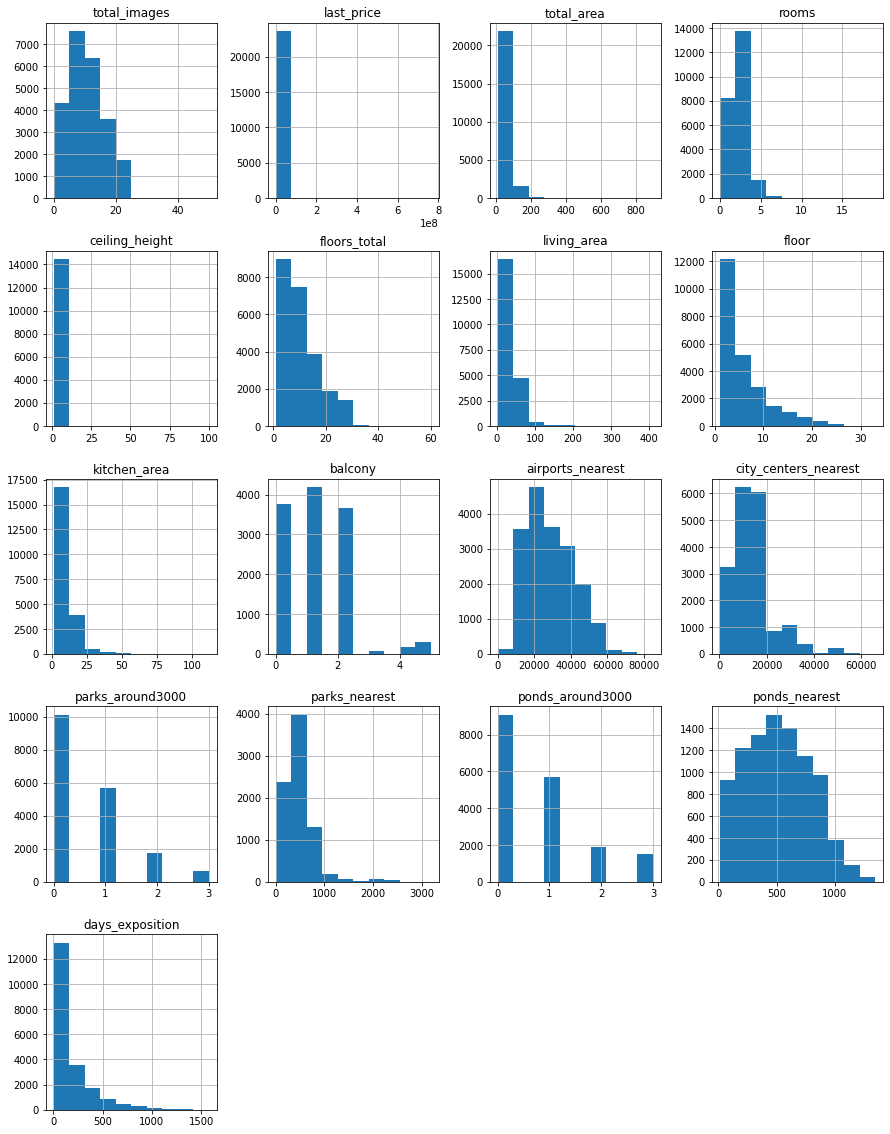

In [6]:
df.hist(figsize=(15, 20))
plt.show()

**Большинство гистограмм выглядит правдоподобно. Однако, есть и некоторые странные моменты. Так, для параметра `ceiling_height` есть небольшое число объектов, для которых высота потолков составляет десятки метров - вероятно, это ошибки записи (возможно высота записана в см, а не в м, или просто указана неверно). Также для параметра `last_price` - есть небольшое количество объектов, стоимость которых очень высока (до 800 млн). Возможно, такие объекты присутствуют на рынке жилья, но они явно являются статистическими выбросами с точки зрения цены.**

**Сохраним первоначальный датасет в переменную `df_initial` и будем работать с переменной `df`:**

In [7]:
df_initial = df

## Предобработка данных в столбцах с пропущенными значениями

**Поработаем со столбцами, где есть пропущенные значения. Для начала оценим, в каких столбцах присутствуют пропуски:**

In [8]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


### Количество балконов и информация о том, является ли объект недвижимости апартаментами:

**Сначала разберемся со столбцами `balcony` и `is_apartment`. Вероятнее всего, что если в объявлении не указано количество балконов, то их нет в квартире. То же самое с апартаментами - это особый класс жилья, и, вероятно, что указывают его только те, кто продает именно апартаменты. Поэтому логично будет предположить, что там, где не указано, является ли объект недвижимости апартаментами, он им не является.**

**Заменим пропущенные значения в `balcony` на 0 и проверим, успешно ли прошла замена:**

In [9]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

**Кроме того, число балконов записано в столбце с типом данных `float` - заменим на `int`, ведь число балконов не может быть дробным:** 

In [10]:
df['balcony'] = df['balcony'].astype('int')

**Построим гистограмму распределения объектов недвижиммости по количеству балконов:**

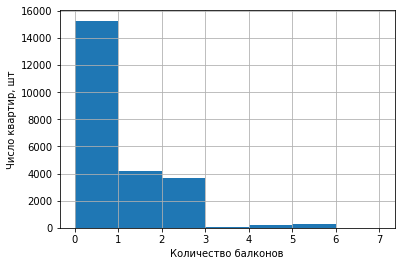

In [11]:
df['balcony'].hist(range=(0,7),bins=7)
plt.xlabel('Количество балконов')
plt.ylabel('Число квартир, шт')
plt.show()

**После замены пропущенных значений, получается, что в большинстве продаваемых квартир нет балконов. Интересно. Возможно, это связано со строительством большого числа новых домов, в которых не делают балконы?**

**Теперь посмотрим на столбец `is_apartment`. Какие в нем уникальные значения?**

In [12]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

**Уникальные значения - False, True и Nan, но тип данных - `object`, а должен быть `bool`. Заменим все NaN на False (т.к. отсутствие информации о том, что объект недвижимости - апартаменты, скорее всего означает, что он ими не является) и изменим тип данных столбца на `bool`**:

In [13]:
df['is_apartment'] = df['is_apartment'].fillna('False').astype('bool')

In [14]:
df['is_apartment'].unique()

array([ True, False])

### Высота потолков
**Теперь посмотрим на столбец `ceiling_height`. Во-первых, в нем много пропущенных значений. Во вторых, как было видно из гистограмм, построенных в начале, там есть неправдоподобно большие значения. Рассмотрим данные в столбце более детально:** 

In [15]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

**Оказывается, есть не только очень большие, но и очень маленькие значения `ceiling_height`. Вряд ли высота потолков в квартире ниже 2.4 м - частое явление. Посмотрим распределение таких квартир в датасете:**

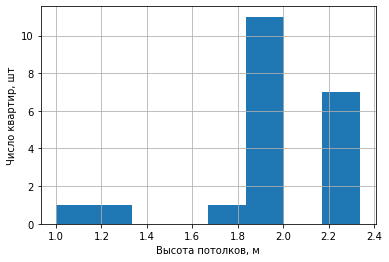

In [16]:
df.query('ceiling_height < 2.4')['ceiling_height'].hist(bins=8)
plt.xlabel('Высота потолков, м')
plt.ylabel('Число квартир, шт')
plt.show()

**Действительно, таких квартир немного. Теперь сравним с распределением, куда включены квартиры с высотой потолков 2.4-2.5 м:** 

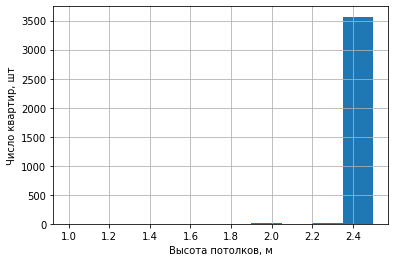

In [17]:
df.query('ceiling_height <= 2.5')['ceiling_height'].hist(bins=10)
plt.xlabel('Высота потолков, м')
plt.ylabel('Число квартир, шт')
plt.show()

**Решено - заменим значения `ceiling_height` < 2.4 на `nan` - т.к. их мало, и они малоправдоподобны** 

In [18]:
df.loc[df['ceiling_height'] < 2.4, 'ceiling_height'] = np.nan
df['ceiling_height'].sort_values().unique()

array([  2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
         3.5 ,   3.51,   3.52,   3.53,   3.54,   3.55,   3.56,   3.57,
      

**Можно предположить, что значения `ceiling_height` равные 25,  26,  27,  27.5, 32 м - ошибки записи, и на самом деле это 2.5, 2.6, 2.75 и 3.2 м. Выполним замену:**

In [19]:
df.update(df[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32)]['ceiling_height']/10)
df['ceiling_height'].sort_values().unique()

array([  2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
         3.5 ,   3.51,   3.52,   3.53,   3.54,   3.55,   3.56,   3.57,
      

**Посмотрим сколько в датафрейме осталось квартир с потолками выше 6 метров и выведем их список:**

In [20]:
print(len(df.query('ceiling_height > 6')))
print(df.query('ceiling_height > 6'))

10
       total_images  last_price  total_area first_day_exposition  rooms  \
3474              3   1400000.0        30.0  2018-03-16T00:00:00      1   
5076              0   3850000.0        30.5  2018-10-03T00:00:00      1   
5863             20   5650000.0        45.0  2018-08-15T00:00:00      1   
15061            19   5600000.0        56.4  2018-05-11T00:00:00      2   
15743            14   5600000.0        67.0  2016-11-11T00:00:00      3   
17442             0   5350000.0        54.0  2015-06-16T00:00:00      2   
17496            15   6700000.0        92.9  2019-02-19T00:00:00      3   
20507            12   5950000.0        60.0  2018-02-19T00:00:00      2   
22309            20   5300000.0        45.0  2017-09-30T00:00:00      1   
22869             0  15000000.0        25.0  2018-07-25T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
3474              8.0           5.0         15.3      2         False  ...   
5076           

**Таких квартир всего 10. При соотнесении указанной высоты потолков со стоимостью квартир, их метражом и другими параметрами, возникают сомнения в том, что данные о `ceiling_height` указаны верно. Заменим их на `nan` и выведем список уникальных значений столбца по всему датафрейму. Так выглядит правдоподобнее:** 

In [21]:
df.loc[df['ceiling_height'] > 6, 'ceiling_height'] = np.nan
df['ceiling_height'].sort_values().unique()

array([2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54,
       2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65,
       2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76,
       2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87,
       2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98,
       2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09,
       3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21,
       3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32,
       3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44,
       3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55,
       3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68,
       3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.15,
       4.19, 4.2 , 4.25, 4.3 , 4.37, 4.4 , 4.45, 4.

### Количество этажей в доме

**В столбце `floors_total` есть 86 пропусков - мы не можем заменить их каким-то единым значением, или узнать реальные. Поэтому оставим пропуски в этом столбце без изменений.** 

**Тип данных в `floors_total` - `float`, заменим его на `int`, чтобы не оперировать дробными этажами в дальнейшем:**

In [22]:
df['floors_total'] = df['floors_total'].astype('Int64')

In [23]:
df['floors_total'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   33,   34,   35,   36,   37,   52,   60, <NA>]
Length: 37, dtype: Int64

**По имеющимся в интернете данным, в Санкт-Петербурге и пригородах нет жилых зданий выше 36 этажей. Заменим данные об общей этажности свыше 36 этажей на `nan`:** 

In [24]:
df.loc[df['floors_total'] > 36, 'floors_total'] = np.nan

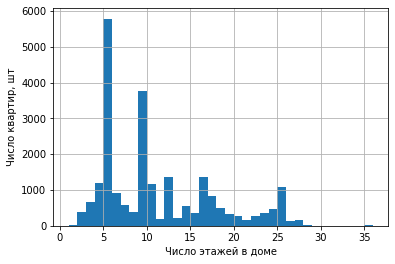

In [25]:
df['floors_total'].hist(bins=35)
plt.xlabel('Число этажей в доме')
plt.ylabel('Число квартир, шт')
plt.show()

### Жилая площадь

**В столбце `living_area` есть пропущенные данные - 1903 строки. Жилая площадь, скорее всего сильно кореллирует с числом комнат в квартире. Проверим - построим диаграмму рассеяния и вычислим коэффициент корреляции:**

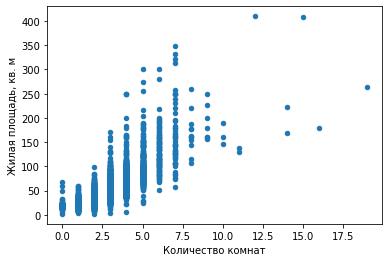

Коэффициент корреляции: 0.8459774567888745


In [26]:
df.plot(x='rooms', y = 'living_area', kind = 'scatter')
plt.xlabel('Количество комнат')
plt.ylabel('Жилая площадь, кв. м')
plt.show()
print('Коэффициент корреляции:', df['living_area'].corr(df['rooms']))

**Корреляция действительно высокая - можно заменить пропущенные значения `living_area` на медианные значения этого показателя в квартирах с соответствующим числом комнат:**

In [27]:
for room_number in df['rooms'].unique():
    df.loc[(df['rooms'] == room_number) & df['living_area'].isna(), 'living_area'] \
    = df.loc[df['rooms'] == room_number, 'living_area'].median()
df['living_area'].isna().sum()    

0

**Построим гистограмму распределения жилой площади по всем объектам недвижимости в датафрейме:**

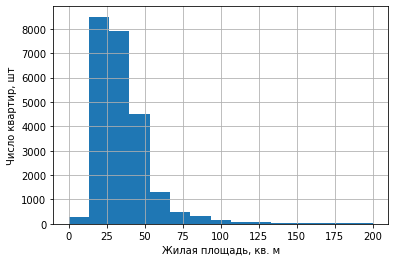

In [28]:
df['living_area'].hist(bins=15, range=(0,200))
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Число квартир, шт')
plt.show()

In [29]:
df['living_area'].describe()

count    23699.000000
mean        34.321982
std         21.700627
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

**Медианная квартира имеет жилую площадь около 30 кв. м., жилая площадь 75% квартир не превышает 43 кв. м. Квартиры с жилой площадью больше 200 м кв. уже большая редкость.**

In [30]:
len(df.query('living_area > 200'))

31

### Площадь кухни

**Посмотрим описание основных стат. параметров для столбца `kitchen_area`:**

In [31]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**В датасете есть пропущенные значения для `kitchen_area` - 2278 штук. Проверим, для каких квартир не указана пощадь кухни. Может, это студии?**

In [32]:
no_kitchen_area = df.query('kitchen_area.isna()')
print('Студий без указанной площади кухни:', len(no_kitchen_area.query('studio == True')))
print('Других квартир без указанной площади кухни:', len(no_kitchen_area.query('studio == False')))

Студий без указанной площади кухни: 149
Других квартир без указанной площади кухни: 2129


**Теория не подтвердилась - среди квартир, у которых не указана площадь кухни, есть как студии (что логично), так и квартиры с комнатами. Попробуем заполнить пропуски в `kitchen_area` следующим образом - рассчитаем во сколько раз медианная кухня меньше медианной общей площади объекта, а затем для квартир с пропущенным значением `kitchen_area` заполним его результатом от деления общей площади на полученный коэффициент:**

In [33]:
#Рассчитываем медианную площадь площадь кухни по всем объектам:

median_kitchen = df['kitchen_area'].median()
median_kitchen

9.1

In [34]:
#Рассчитываем медианную общую площадь по всем объектам:

median_total_area = df['total_area'].median()
median_total_area

52.0

In [35]:
# Рассчитываем соотношение:

ratio = median_total_area/median_kitchen
ratio 

5.714285714285714

**Медианная кухня почти в шесть раз меньше медианной общей площади картиры. Теперь на основе этих данных заполним пропуски в `kitchen_area` для всех квартир кроме студий, в которых нет отдельной кухни:** 

In [36]:
df.loc[(df['kitchen_area'].isna()) & ~df['studio'], 'kitchen_area'] \
= df.loc[(df['kitchen_area'].isna()) & ~df['studio'], 'total_area']/ratio

**Проверим, сколько пропущенных значений осталось в столбце `kitchen_area`. По идее пропущенными должны остаться только студии:**

In [37]:
df['kitchen_area'].isna().sum()

149

**Да, число пропущенных ячеек в `kitchen_area` совпадает с числом студий. Посмотрим как изменились основные стат. показатели столбца после замены:** 

In [38]:
df['kitchen_area'].describe()

count    23550.000000
mean        10.541201
std          6.040337
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**Изменения незначительны. Медианная площадь кухни - 9 м кв., 75% кухонь имеют площадь до 12 метров. Максимальная площадь кухни - 112 метров - такое вполне можно себе представить, если это кухня-столовая в элитной квартире. Минимальный размер - 1.3 кв. м., неправдоподобно мал, хотя иногда встречаются квартиры с кухней в виде маленькой комнатки в которую помещается только плита и раковина. Может быть этот тот вариант.** 

### Название населенного пункта
**Изучим список уникальных названий населенных пунктов, в которых продавались квартиры:**

In [39]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**Уберем строки, в которых не содержится информация о населенном пункте:**

In [40]:
df = df.dropna(subset=['locality_name'])

In [41]:
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].astype(str)

**Создадим функцию, которая позволит унифицировать названия населенных пунктов так, чтобы не было их неявных дубликатов:**

In [42]:
def rename_locality(row):
    #
    if 'поселок городского типа' in row['locality_name']:
        name = row['locality_name'][23:]
        return f'ПГТ{name}'
    elif 'посёлок городского типа' in row['locality_name']:
        name = row['locality_name'][23:]
        return f'ПГТ{name}'
    elif 'городской поселок' in row['locality_name']:
        name = row['locality_name'][17:]
        return f'ПГТ{name}'
    elif 'городской посёлок' in row['locality_name']:
        name = row['locality_name'][17:]
        return f'ПГТ{name}'
    elif 'посёлок при железнодорожной станции' in row['locality_name']:
        name = row['locality_name'][35:]
        return f'п. ж/д ст.{name}'
    elif 'поселок станции' in row['locality_name']:
        name = row['locality_name'][15:]
        return f'п. ж/д ст.{name}'
    elif 'посёлок станции' in row['locality_name']:
        name = row['locality_name'][15:]
        return f'п. ж/д ст.{name}'
    elif 'посёлок' in row['locality_name'] and 'коттеджный' not in row['locality_name']:
        name = row['locality_name'][7:]
        return f'поселок{name}'
    elif 'садоводческое некоммерческое товарищество' in row['locality_name']:
        name = row['locality_name'][41:]
        return f'СНТ{name}'
    elif 'садовое товарищество' in row['locality_name']:
        name = row['locality_name'][20:]
        return f'СНТ{name}'
    
    else:
        name = row['locality_name']
        return name

**При помощи этой функции создадим в `df` новый столбец `new_locality_name` c названиями населенных пунктов без дубликатов:**

In [43]:
df['new_locality_name'] = df.apply(rename_locality, axis=1)

In [44]:
df['new_locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'ПГТ Большая Ижора', 'ПГТ Будогощь',
       'ПГТ Важины', 'ПГТ Виллози', 'ПГТ Вознесенье', 'ПГТ Вырица',
       'ПГТ Дружная Горка', 'ПГТ Дубровка', 'ПГТ Ефимовский',
       'ПГТ Кондратьево', 'ПГТ Красный Бор', 'ПГТ Кузнечное',
       'ПГТ Кузьмоловский', 'ПГТ Лебяжье', 'ПГТ Лесогорский', 'ПГТ Мга',
       'ПГТ Назия', 'ПГТ Никольский', 'ПГТ Новоселье', 'ПГТ Павлово',
       'ПГТ Приладожский', 'ПГТ Рахья', 'ПГТ Рощино', 'ПГТ Рябово',
       'ПГТ Свирьстрой', 'ПГТ Сиверский', 'ПГТ Синявино', 'ПГТ Советский',
       'ПГТ Тайцы', 'ПГТ Токсово', 'ПГТ Ульяновка', 'ПГТ Форносово',
       'ПГТ Фёдоровское', 'ПГТ Янино-1', 'ПГТ имен

### Расстояние до ближайшего аэропорта

In [45]:
df['airports_nearest'].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

**Здесь есть значения равные 0 - это странно. Вряд ли квартира может располагаться прямо в эаропорту. Посмотрим сколько таких объектов, и уберем для них значения `airports_nearest`:**

In [46]:
df.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,19.8,3,True,...,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0,Санкт-Петербург


In [47]:
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = np.nan

**С пропущенными значениями в `airports_nearest` придется смириться, т.к. для получения точных значений нужно знать точный адрес объекта. Для удобства последующей работы переведем расстояние до аэропорта в километры:**

In [48]:
df['airports_nearest'] = df['airports_nearest']/1000

### Расстояние до центра города

In [49]:
df['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

**Судя по описанию основных статистических параметров, особо выдающихся значений в столбце `city_centers_nearest` нет. Медианная квартира расположена на расстоянии около 9.2 км от центра города, т.е. находится в Санкт-Петербурге. 75% квартир расположены на расстоянии не более 17 км от центра города - непосредственно в СПб и ближайших пригородах. Заполнять пропущенные значения в этом столбце не будем, т.к. для расчета точного расстояния нужно иметь информацию не только о населенном пункте, в котором расположена квартира, но и ее точный адрес**   

### Данные о парках и водоемах поблизости
**В датасете присутствует четыре столбца с данными о том, сколько водоемов `ponds_around3000` и парков `parks_around3000` в радиусе 3 км от объекта недвижимости, а также данные о расстоянии до ближайшего водоема `ponds_nearest` и парка `parks_nearest`. Такие данные сильно зависят от географического положения конкретного объекта недвижимости. Поэтому пропущенные данные в этих столбцах не могут быть восстановлены без информации об адресе объекта. В связи с этим, пропущенные значения в этих столбцах оставим как есть.**

**В оригинальном датасете данные в `ponds_around3000` и `parks_around3000` представлены в формате `float64`. Логично будет перевести их в формат `int`, поскольку количество водоемов и парков описывается натуральными числами:**  

In [50]:
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')

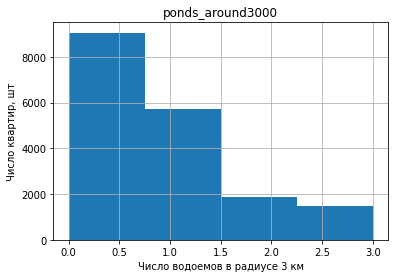

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

In [51]:
df.hist('ponds_around3000', range=(0,3),bins=4)
plt.xlabel('Число водоемов в радиусе 3 км')
plt.ylabel('Число квартир, шт')
plt.show()

df['ponds_around3000'].sort_values().unique()

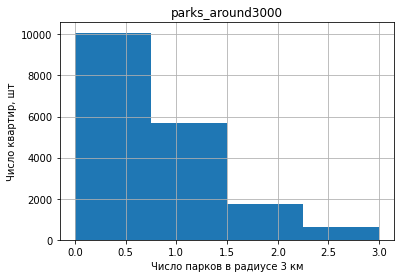

<IntegerArray>
[0, 1, 2, 3, <NA>]
Length: 5, dtype: Int64

In [52]:
df.hist('parks_around3000', range=(0,3),bins=4)
plt.xlabel('Число парков в радиусе 3 км')
plt.ylabel('Число квартир, шт')
plt.show()
df['parks_around3000'].sort_values().unique()

**Данные в столбцах `ponds_nearest` и `park_nearest` для удобства переведем в километры:**

In [53]:
df['ponds_nearest'] = df['ponds_nearest']/1000
df['parks_nearest'] = df['parks_nearest']/1000

**Посмотрим описание основных метрик для этих параметров:**

In [54]:
df['ponds_nearest'].describe()

count    9085.000000
mean        0.518060
std         0.277842
min         0.013000
25%         0.293000
50%         0.502000
75%         0.730000
max         1.344000
Name: ponds_nearest, dtype: float64

In [55]:
df['parks_nearest'].describe()

count    8064.000000
mean        0.490831
std         0.342554
min         0.001000
25%         0.288000
50%         0.454500
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

**Выглядит правдоподобоно: среднее расстояние до ближайшего водоема или парка около 0.5 км. Нулевых значений нет, зашкаливающих - тоже.**

### Продолжительность размещения объявления

**Еще один столбец, в котором сть пропущенные значения - продолжительность размещения объявления `days_exposition`. Пропущенных значений в нем немногим более 3 тыс. Заполнять эти пропуски не будем поскольку мы не можем точно сказать, по какой причине они появились. Конечно, могло быть так, что данные просто потерялись, но также возможен вариант, что на момент выгрузки данных квартира еще находилась в продаже.**

**Переведем данные в столбце `days_exposition` в формат `int`:** 

In [56]:
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')

In [57]:
df['days_exposition'].dtype

Int64Dtype()

**Посмотрим на основные характеристики столбца `days_exposition`:**

In [58]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Минимальное значение - 1 день, максимальное - 1580, медианное - 180. 75 % объявлений активны не более 232 дней. Среднее значение очень сильно отличается от медианы (180 и 95 дней, соответственно). Построим гистограмму:** 

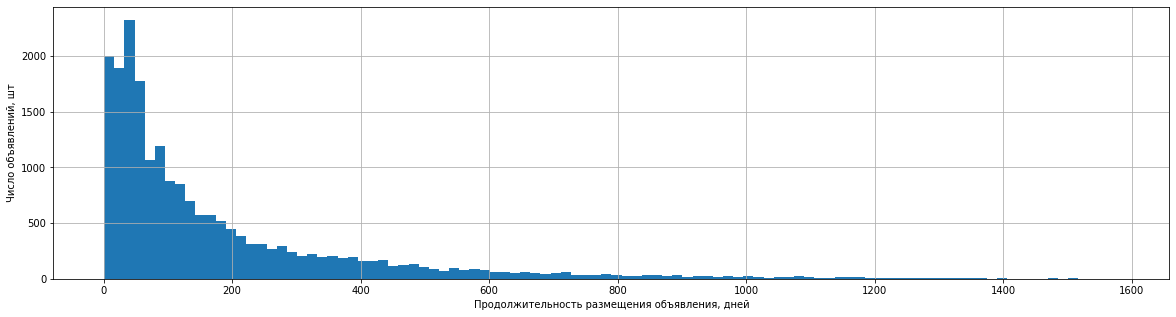

In [59]:
plt.rcParams['figure.figsize']=(20, 5)
df['days_exposition'].hist(bins=100)
plt.xlabel('Продолжительность размещения объявления, дней')
plt.ylabel('Число объявлений, шт')
plt.show()

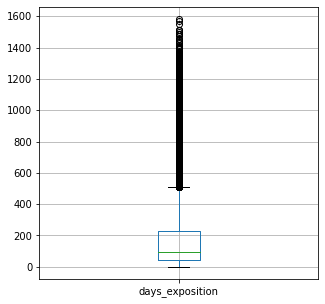

In [60]:
plt.rcParams['figure.figsize']=(5, 5)
df.boxplot(column = 'days_exposition')
plt.ylabel('Время размещения объявления, дней')
plt.ylabel('')
plt.show()



**По этим графикам можно предположить следующее. Часть объявлений "висит" очень долго: возможно люди продали квартиру или передумали продавать и забыли снять объявление. Другая часть объявлений - снимается в первые несколько дней после публикации. Вряд ли покупатель находится так быстро, скорее всего это те, кто по каким-то причинам передумал продавать жилье.**

## Предобработка данных в столбцах, где нет пропущенных значений:

**В нескольких столбцах пропущенных значений не было: `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan`. Типы данных для них выбраны верно. Проверим, нет ли в этих столбцах необычных, выбивающихся значений**

### Параметры `studio` и `open_plan` с булевыми значениями

**Проверим уникальные значения в столбце `studio` и узнаем сколько студий в нашем датасете:**

In [61]:
df['studio'].unique()

array([False,  True])

In [62]:
len(df.query('studio == True'))

149

**Всего 149 квартир-студий. Посмотрим, соответствует ли это числу квартир, в которых указано 0 комнат:**

In [63]:
df.query('rooms == 0')['rooms'].count()

197

**Не соответсвует. Возможно разница присутствует из-за квартир со свободной планировкой. Посмотрим, какие значения содержит столбец `open_plan` и сколько в датафрейме таких квартир:**

In [64]:
df['open_plan'].unique()

array([False,  True])

In [65]:
len(df.query('open_plan == True'))

67

**149 + 67 = 216 - это больше, чем число квартир с 0 комнат. Видимо, в части квартир со свободной планировкой владельцы указали исходное число комнат, или перепланировка превратила квартиру не в студию, а в однушку или двушку**

### Этаж, на котором расположена квартира

**Параметр `floor` имеет формат `int64` и это правильно. Посмотрим как распределены квартиры по этажам, нет ли каких-то странностей:**

In [66]:
df['floor'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

**Медианная квартира располагается на 4 этаже. Минимальный этаж 1, максимальный - 33. Кажется, все в порядке**

### Число комнат

**Посмотрим распределение квартир по числу комнат:**

In [67]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**Медианное число комнат - 2. Минимальное - 0, максимальное - 19.**

**Переведем из типа `float64` в `int64` - натуральные числа:**

In [68]:
df['rooms'] = df['rooms'].astype('int64')
df['rooms'].dtype

dtype('int64')

### Цена квартир

In [69]:
df['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

**Информация о ценах на квартиры выглядит правдоподобно, за исключением одного момента - минимальной стоимости квартир: она слишком низкая - ниже 13000. Посмотрим, что за объекты продаются по такой цене:** 

In [70]:
df.query('last_price < 13000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25,32.0,25,True,...,0,Санкт-Петербург,36.421,9176.0,1,0.805,0,NaN,8,Санкт-Петербург


**Квартира в Санкт-Петербурге, с очень низкой ценой (либо ошибкой в цене), общей площадью 109 кв.м, на 25 этаже в самом центре города. Очень странное сочетание параметров. Скорее всего информация об этой квартире неверная. Удалим ее из датасета:** 

In [71]:
df = df.drop(index=[8793]).reset_index(drop=True)

**Оценим, какая доля от изначального количества данных, осталась после выполнения предобработки:**

In [72]:
shape_before = df_initial.shape
print('Размер изначального датасета:', shape_before)

shape_after = df.shape
print('Размер датасета после предобработки:', shape_after)

Размер изначального датасета: (23699, 22)
Размер датасета после предобработки: (23649, 23)


**Размер датасета уменьшился всего на 50 строк. Это пренебрежимо малая величина по сравнению с общим размером датасета в более чем 23 тысячи строк. Также добавился один столбец, который содержит названия населенных пунктов без неявных дубликатов - `new_locality_name`**

## Подготовка данных для категоризации

**Добавим в датафрейм `df` несколько новых столбцов, которые будут в дальнейшем использованы для категоризации данных, а именно:**

`price_per_meter_sq` - цена одного квадратного метра;

`day_of_week` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

`month` - месяц публикации объявления;

`year` - год публикации объявления;

`floor_type` - тип этажа квартиры («первый», «последний», «другой»);

`distance_from_center_km` - расстояние до центра города в километрах.

### Цена одного квадратного метра
**Чтобы рассчитать цену за квадратный метр, разделим стоимость квартиры на ее общую площадь в метрах:** 

In [73]:
df['price_per_meter_sq'] = df['last_price']/df['total_area']
df['price_per_meter_sq'].describe()

count    2.364900e+04
mean     9.943645e+04
std      5.033486e+04
min      7.962963e+03
25%      7.662116e+04
50%      9.500000e+04
75%      1.142771e+05
max      1.907500e+06
Name: price_per_meter_sq, dtype: float64

**Посмотрим, что за квартиры имеют стоимость ниже 10 тыс за кв.м.:**

In [74]:
df.query('price_per_meter_sq < 10000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter_sq
4398,9,500000.0,52.0,2018-08-02T00:00:00,2,2.7,2,31.0,1,True,...,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,110,Сланцы,9615.384615
14885,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3,30.5,3,True,...,посёлок станции Свирь,NaN,NaN,<NA>,NaN,<NA>,NaN,44,п. ж/д ст. Свирь,7962.962963


**Похоже, что это жилье в очень отдаленных местах Ленинградской области. По-видимому, в старом фонде. 
Теперь выведем список квартир, стоимость которых за кв. м превышает 1 млн:**

In [75]:
df.query('price_per_meter_sq > 1000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter_sq
1435,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7,95.0,5,True,...,Санкт-Петербург,23.011,1197.0,3,0.519,3,0.285,233,Санкт-Петербург,1.736842e+06
12949,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10,250.0,10,True,...,Санкт-Петербург,25.108,3956.0,1,0.530,3,0.756,33,Санкт-Петербург,1.907500e+06
14680,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9,204.0,9,False,...,Санкт-Петербург,21.912,2389.0,1,0.545,1,0.478,393,Санкт-Петербург,1.000748e+06
22783,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6,63.7,6,True,...,Санкт-Петербург,22.494,1073.0,3,0.386,3,0.188,<NA>,Санкт-Петербург,1.542605e+06


**Здесь ошибок тоже нет, все это квартиры с большой площадью в самом центре Петербурга.**

### День публикации объявления

**Создадим новый столбец `day_of_week`, в который запишем информацию о дне недели, в который было опубликовано объявление. Для этого используем данные из столбца `first_day_exposition`:**

In [76]:
df['day_of_week'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.weekday 

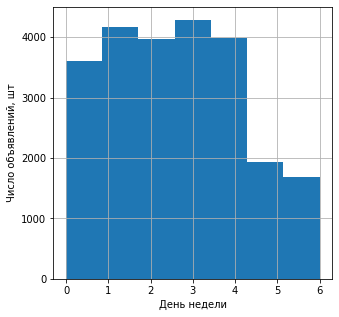

dtype('int64')

In [77]:
plt.rcParams['figure.figsize']=(5, 5)
df['day_of_week'].hist(bins=7)
plt.xlabel('День недели')
plt.ylabel('Число объявлений, шт')
plt.show()
df['day_of_week'].dtype

**Столбец `day_of_week` готов. Больше всего объявлений публикуют в будние дни, и существенно меньше - по выходным**

### Месяц и год публикации объявления

**По аналогии с `day_of_week` извлечем из столбца `first_day_exposition` информацию о месяце и годе публикации объявления и запишем ее в столбцы `month` и `year`, соответственно:**

In [78]:
df['month'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.month

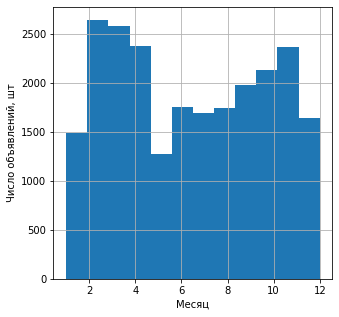

dtype('int64')

In [79]:
df['month'].hist(bins=12)
plt.xlabel('Месяц')
plt.ylabel('Число объявлений, шт')
plt.show()
df['month'].dtype

**Распределение объявлений по месяцу публикации неравномерно: наибольшая активность наблюдается в феврале, марте и апреле. Январь, декабрь и летние месяцы можно назвать мертвым сезоном. С конца лета и до ноября активность продавцов равномерно увеличивается. Скорее всего, такая картина связана с сезонными трендами - летом люди идут в отпуска, декабрь и январь - месяцы в которые люди готовятся к праздникам или находятся на новогодних каникулах, т.е. им не до продажи недвижимости.**

**Теперь создадим столбец `years`:**

In [80]:
df['year'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S').dt.year 

In [81]:
df['year'].sort_values().unique()

array([2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

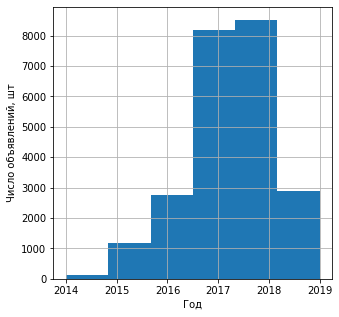

dtype('int64')

In [82]:
df['year'].hist(bins=6, range=(2014, 2019))
plt.xlabel('Год')
plt.ylabel('Число объявлений, шт')
plt.show()
df['year'].dtype

**В датасете есть данные по 6-ти годам: с 2014 по 2019. Посмотрим, какими месяцами датированы объявления из 2014 и 2019 годов:**

In [83]:
df.query('year == 2014')['month'].sort_values().unique()

array([11, 12], dtype=int64)

In [84]:
df.query('year == 2019')['month'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

**Получается, что датасет сформирован на основе данных с ноября 2014 по май 2019 года. Такое формирование может влиять на вид общей гистограммы по месяцам, которую мы получили в начале этого пункта. По идее, чтобы правильно оценить активность по месяцам нужно избавиться от данных неполных годов - т.е. от 2014 и 2019. Попробуем:**

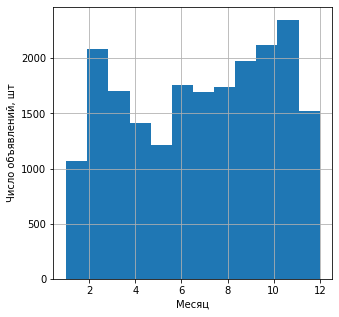

In [85]:
df.query('year != [2014, 2019]')['month'].hist(bins=12)
plt.xlabel('Месяц')
plt.ylabel('Число объявлений, шт')
plt.show()

**Картина действительно поменялась: теперь "мертвыми" выглядят только январь и май. Вероятно, это связано с длинными каникулами в том и другом месяце. Летом публикаций среднее количество, весной они снижаются от месяца к месяцу, а осенью растут. Самый популярный месяц для публикации объявления о продаже квартиры - ноябрь.**

### Тип этажа квартиры

**Создадим новый столбец `floor_type` в котором на основе данных из столбцов `floor` и `floors_total` запишем значение `первый` для квартир на первом этаже, `последний` - для квартир на последнем этаже и `другой` - для всех остальных. Для этого создадим функцию `get_floor_type`, которая будет принимать в качестве аргумента имя датафрейма:** 

In [86]:
a=np.nan
def get_floor_type(row):
    if pd.isna(row['floors_total']): #условие если не указано общее число этажей в доме - вернуть "неизвестно"
        return 'неизвестно'
    elif row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [87]:
df['floor_type'] = df.apply(get_floor_type, axis=1)

In [88]:
df['floor_type'].unique()

array(['другой', 'первый', 'последний', 'неизвестно'], dtype=object)

### Расстояние до центра города в километрах

**Данные из столбца `city_centers_nearest` переведем в километры, округлим до целых значений и запишем в новый столбец `city_centers_km`:**

In [89]:
df['city_centers_km'] = (df['city_centers_nearest']/1000).round()

In [90]:
df['city_centers_km'].describe()

count    18138.000000
mean        14.191862
std          8.614796
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_km, dtype: float64

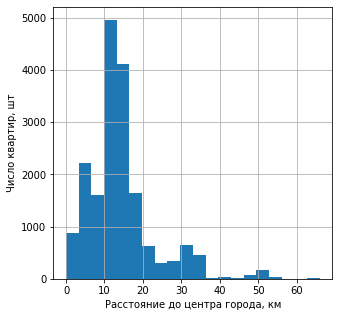

In [91]:
df['city_centers_km'].hist(bins=20)
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Число квартир, шт')
plt.show()

In [92]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter_sq,day_of_week,month,year,floor_type,city_centers_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,2,0.755,<NA>,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,True,...,0,NaN,81,поселок Шушары,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,True,...,2,0.574,558,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,45.0,9,True,...,3,0.234,424,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,1,0.048,121,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0


## Исследовательский анализ данных

### Параметры объектов недвижимости

**В этом разделе рассмотрим основные параметры объектов недвижимости, построим гистограммы и отметим особенности данных**

#### Общая площадь квартиры

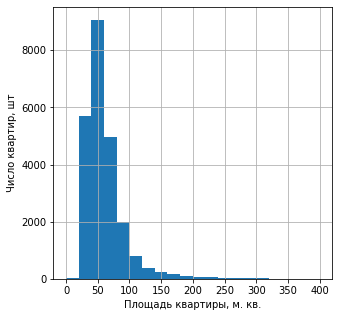

In [93]:
df['total_area'].hist(bins=20, range=(0,400))
plt.xlabel('Площадь квартиры, м. кв.')
plt.ylabel('Число квартир, шт')
plt.show()

In [94]:
df['total_area'].describe()

count    23649.000000
mean        60.327011
std         35.661158
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

**Данные об общей площади выглядят правдоподобно: у медианной квартиры площадь 52 кв.м., 75% картир имеют площадь до 70 кв.м. Распределение площади квартир асимметрично: есть малое количество квартир с очень большой площадью - свыше 400 кв.м:** 

In [95]:
len(df.query('total_area > 400'))

23

**Почти так же мало квартир с площадью меньше 20 кв. м:"**

In [96]:
len(df.query('total_area < 20'))

27

#### Жилая площадь

**Посмотрим, как распределяются квартиры по своей жилой площади:**

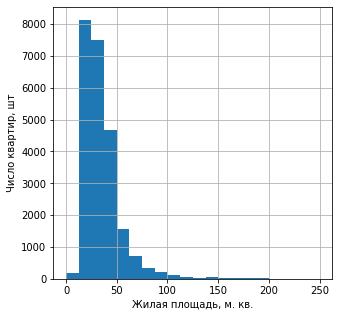

In [97]:
df['living_area'].hist(bins=20, range=(0,250))
plt.xlabel('Жилая площадь, м. кв.')
plt.ylabel('Число квартир, шт')
plt.show()

In [98]:
df['living_area'].describe()

count    23649.000000
mean        34.313219
std         21.708918
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

**Медианная жилая площадь квартиры составляет около 30 кв. м, 75% квартир имеют жилую площадь до 43 кв. м. Есть небольшое число квартир, в которых жилая площадь превышает 200 м или ниже чем 10 м:**

In [99]:
len(df.query('living_area > 200'))

31

In [100]:
len(df.query('living_area < 10'))

25

#### Площадь кухни

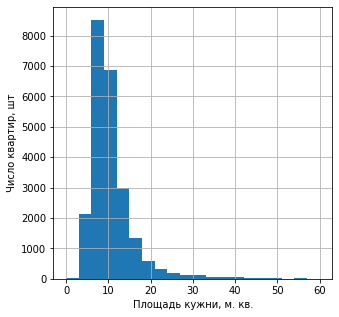

In [101]:
df['kitchen_area'].hist(bins=20,range=(0,60))
plt.xlabel('Площадь кужни, м. кв.')
plt.ylabel('Число квартир, шт')
plt.show()

In [102]:
df['kitchen_area'].describe()

count    23500.000000
mean        10.536566
std          6.034745
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

**Медианная площадь кухни составляет 9.0 м кв., 75% кухонь по площади не превышают 12 м кв.
Кухни площадью больше 50 кв.м. - редкое явление:** 

In [103]:
len(df.query('kitchen_area > 50'))

60

**Так же, как и кухни площадью меньше 4 метров:**

In [104]:
len(df.query('kitchen_area < 4'))

77

#### Цена объекта

In [105]:
df['last_price'].describe()

count    2.364900e+04
mean     6.541403e+06
std      1.089655e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

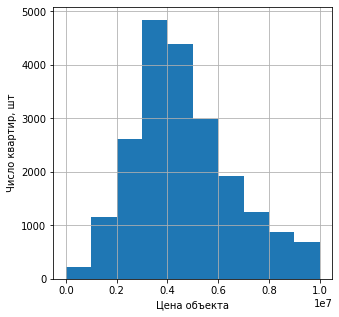

In [106]:
df['last_price'].hist(range=(0,10000000))
plt.xlabel('Цена объекта')
plt.ylabel('Число квартир, шт')
plt.show()

**Цена на квартиры, как и площадь, имеет асимметричное пуассоновское распределение. Медианная стоимость квартиры - 4.65 млн, 75% квартир продаются по цене до 6.8 млн. В распределении есть очень сильно выбивающиеся значения. Так минимальная стоимость квартиры - 430 тыс, а максимальная - 763 млн. Можно предположить, что первая продается в старом фонде где-нибудь в отдаленном уголке Ленинградской области, а вторая имеет огромную площадь и находится в центре СПб:**  

In [107]:
min_price = df['last_price'].min()
df.query('last_price == @min_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter_sq,day_of_week,month,year,floor_type,city_centers_km
14885,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3,30.5,3,True,...,<NA>,NaN,44,п. ж/д ст. Свирь,7962.962963,1,6,2018,последний,NaN
17425,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2,16.0,1,True,...,<NA>,NaN,<NA>,Сланцы,14144.736842,0,4,2019,первый,NaN


In [108]:
max_price = df['last_price'].max()
df.query('last_price == @max_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter_sq,day_of_week,month,year,floor_type,city_centers_km
12949,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10,250.0,10,True,...,3,0.756,33,Санкт-Петербург,1907500.0,5,9,2017,последний,4.0


**Так и есть. Условию минимальной стоимости удовлетворяют две квартиры - в Сланцах, и в п. ж/д ст. Свирь. А квартира с макимальной стоимостью имеет площадь 400 кв. м в самом центе Петербурга**

#### Количество комнат

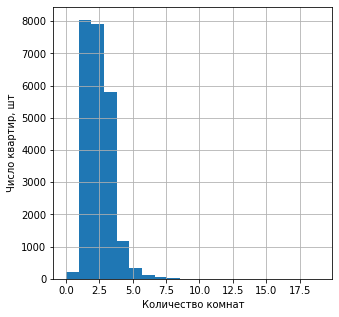

In [109]:
df['rooms'].hist(range=(0,19), bins=20)
plt.xlabel('Количество комнат')
plt.ylabel('Число квартир, шт')
plt.show()

In [110]:
df['rooms'].describe()

count    23649.000000
mean         2.070109
std          1.078643
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

**В медианной квартире - 2 комнаты, в 75% квартир не более 3-х комнат. Есть 0-комнатные квартиры (студии, квартиры со свободной планировкой). Самое большое число комнат в квартире в нашем датасете - 19. Таким образом, это распределение тоже асимметрично.**

#### Высота потолков

In [111]:
df['ceiling_height'].describe()

count    14458.000000
mean         2.727238
std          0.277686
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Число квартир, шт')

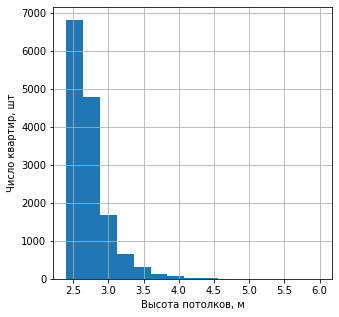

In [112]:
df['ceiling_height'].hist(bins=15)
plt.xlabel('Высота потолков, м')
plt.ylabel('Число квартир, шт')

**Медианное значение высоты потолка - 2 м 65 см. Три четверти всех квартир имеют потолки не выше чем 2 м 80 см. Есть квартиры с очень высокими потолками (>4 м), но их число невелико:** 

In [113]:
len(df.query('ceiling_height > 4'))

46

#### Этаж, на которм расположена квартира

In [114]:
df['floor'].describe()

count    23649.000000
mean         5.892469
std          4.881839
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Text(0, 0.5, 'Число квартир, шт')

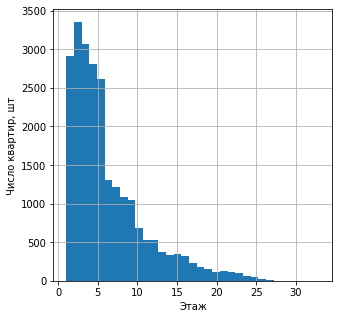

In [115]:
df['floor'].hist(bins=33)
plt.xlabel('Этаж')
plt.ylabel('Число квартир, шт')

**Медианный этаж - четвертый, минимальный - первый, максимальный - 33. 75% квартир расположены на этажах с 1 по 8-ой. По-видимому, это связано с тем, что значительная часть жилья - это многоэтажки с количеством этажей 5 и 9 штук. Это мы проверим в следующем пункте.**

#### Общее количество этажей в доме

Text(0, 0.5, 'Число квартир, шт')

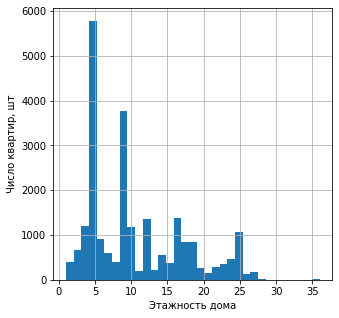

In [116]:
df['floors_total'].hist(bins=33)
plt.xlabel('Этажность дома')
plt.ylabel('Число квартир, шт')

In [117]:
df['floors_total'].describe()

count    23561.000000
mean        10.670303
std          6.579148
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

**На гистограмме отлично видно, дома с каким количеством этажей преобладают в нашем датасете - это 5-ти, 9-ти, 12-ти, 16-ти и 25-этажные дома. Еще можно заметить довольно большое количество домов с 4-мя и 10-ю этажами. Это согласуется с повседневными наблюдениями. Медианный дом, в котором продаются квартиры - это 9-этажка. Квартир в домах с этажностью 30 и более - очень мало, скорее всего потому, что жилых домов с такой этажностью почти нет.**

#### Тип этажа квартиры

Text(0, 0.5, 'Число квартир, шт')

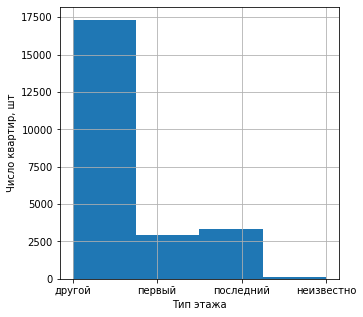

In [118]:
df['floor_type'].hist(bins=4)
plt.xlabel('Тип этажа')
plt.ylabel('Число квартир, шт')

**Большинство квартир расположено не на первом и не на последнем этаже (что логично). Квартир на первых и последних этажах примерно одинаковое число. Есть также небольшое количество квартир, про которые мы не можем сказать, какой у них тип этажа, поскольку не указана этажность здания**

In [119]:
df['floor_type'].value_counts()

другой        17323
последний      3329
первый         2909
неизвестно       88
Name: floor_type, dtype: int64

#### Расстояние до центра города в метрах

Text(0, 0.5, 'Число квартир, шт')

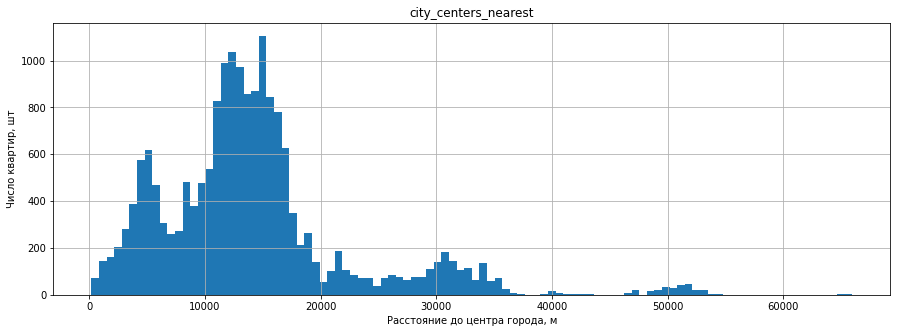

In [120]:
plt.rcParams['figure.figsize']=(15, 5)
df.hist('city_centers_nearest', bins=100)
plt.xlabel('Расстояние до центра города, м')
plt.ylabel('Число квартир, шт')

In [121]:
df['city_centers_nearest'].describe()

count    18138.000000
mean     14198.137612
std       8606.986784
min        181.000000
25%       9241.000000
50%      13106.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

**На гистограмме видны несколько пиков - первый - квартиры в радиусе примерно 5 км от центра города, второй - примерно в 15 км (все это квартиры в Санкт-Петербурге и ближайших пригородах - ), дальше идет маленький узкий пик на примерно 21 км от центра города, это скорее всего Всеволожск. Потом невысокий пологий пик на 30+ км - это, вероятно, районные центры вроде Кировска, Ломоносова и т.п. Дальше идет очень небольшой пик около 50 км. Это более отдаленные населенные пункты - например, Гатчина.** 

#### Расстояние до ближайшего аэропорта

Text(0, 0.5, 'Число квартир, шт')

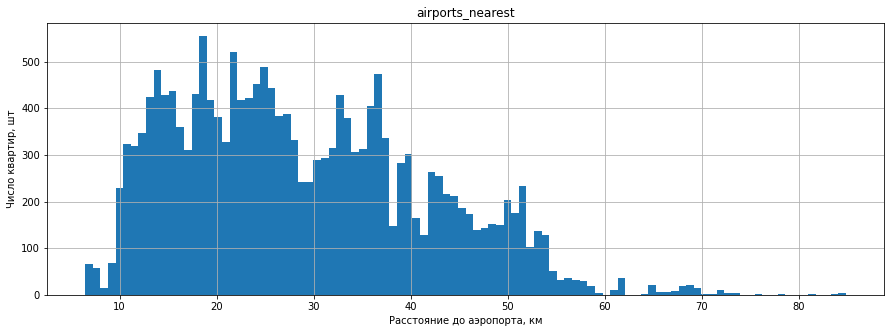

In [122]:
plt.rcParams['figure.figsize']=(15, 5)
df.hist('airports_nearest', bins=100)
plt.xlabel('Расстояние до аэропорта, км')
plt.ylabel('Число квартир, шт')

In [123]:
df['airports_nearest'].describe()

count    18114.000000
mean        28.804395
std         12.636073
min          6.450000
25%         18.576000
50%         26.756500
75%         37.294000
max         84.869000
Name: airports_nearest, dtype: float64

**Распределение числа квартир по расстоянию до аэропорта имеет предсказуемый вид. Поскольку большинство квартир в датасете находятся в СПб и ближайших пригородах, а аэропорт расположен на юге СПб, в большинстве случаев до аэропорта будет дальше, чем до центра - медианы 26 и 13 км, соответственно. Есть и небольшое количество квартир, которые расположены в пределах 5-10 км от аэропорта - это, вероятно, южные районы СПб и южные пригороды.**

#### Расстояние до ближайшего парка

In [124]:
df['parks_nearest'].describe()

count    8063.000000
mean        0.490792
std         0.342558
min         0.001000
25%         0.288000
50%         0.454000
75%         0.612000
max         3.190000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'Число квартир, шт')

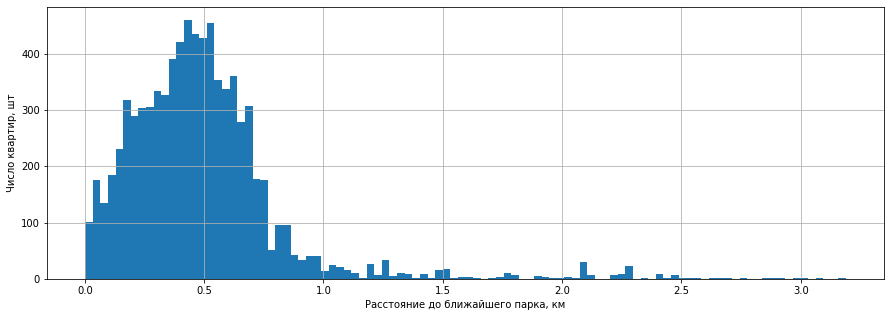

In [125]:
df['parks_nearest'].hist(bins=100)
plt.xlabel('Расстояние до ближайшего парка, км')
plt.ylabel('Число квартир, шт')

**Расстояние до ближайшего парка указано лишь в 25% всех объявлний. Как правило, такую информацию указывают, если она показывает жилье в выгодном свете. Например, никто не будет писать, что в Западном Мурино до ближайшего парка с десяток километров. Можно предположить, что расстояние до ближайшего парка будет указано для жилья комфорт-класса и элитного жилья. Чтобы это проверить можно сравнить медианные цены квартир с указанным и не указанным расстоянием до парка:** 

In [126]:
df.query('parks_nearest.isna()')['last_price'].median()

4150000.0

**^это медиана стоимости жилья без указания наличия парка поблизости**

In [127]:
df.query('~parks_nearest.isna()')['last_price'].median()

5870000.0

**^а это с парком**

**Гипотеза отчасти подтвердилась - квартиры с указанием расстояния до парка стоят дороже, чем без**

#### День и месяц публикации объявления

**Построим гистограмму для дня недели:**

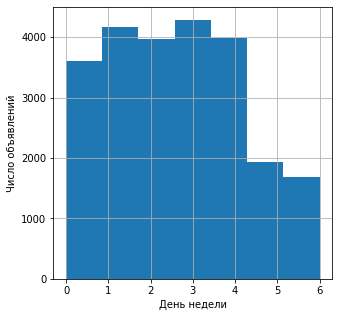

In [128]:
plt.rcParams['figure.figsize']=(5, 5)
df['day_of_week'].hist(bins=7)
plt.xlabel('День недели')
plt.ylabel('Чиcло объявлений')
plt.show()

**Больше всего объявлений публикуют в будние дни, и существенно меньше - по выходным**

**Поскольку в датасете есть данные за неполные годы - 2014 (представлены только ноябрь и декабрь) и 2019 (с января по май), чтобы не исказить распределение публикаций объявлений по месяцам, построим гистограмму по датасету, исключив из него данные за неполные годы**

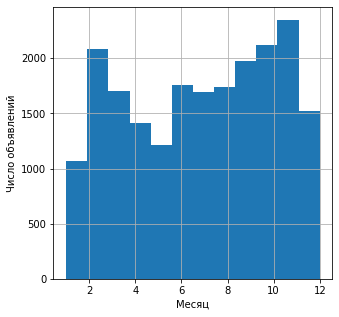

In [129]:
df.query('year != [2014, 2019]')['month'].hist(bins=12)
plt.xlabel('Месяц')
plt.ylabel('Чиcло объявлений')
plt.show()

**Январь и май самые непопулярные месяцы для подачи объявления о продаже квартиры. Вероятно, это связано с длинными каникулами в том и другом месяце. Летом публикаций среднее количество, в феврале, марте и апреле -стабильно высокое. Осенью наблюдается рост числа объявлений от месяца к месяцу. Самый популярный месяц для публикации объявления о продаже квартиры осенью - ноябрь.**

### Как быстро продаются квартиры?

**Проверим, как быстро продавались квартиры. Столбец `days_exposition` хранит информацию о том, сколько дней было размещено каждое объявление. Сначала посмотрим описание основных параметров по выборке значений из этого столбца:** 

In [130]:
df['days_exposition'].describe()

count    20469.000000
mean       180.761640
std        219.779967
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Минимальное значение - 1 день, максимальное - 1580, медианное - 180. 75 % объявлений активны не более 232 дней. Среднее значение очень сильно отличается от медианы (180 и 95 дней, соответственно). Построим гистограмму:** 

Text(0, 0.5, 'Чиcло объявлений')

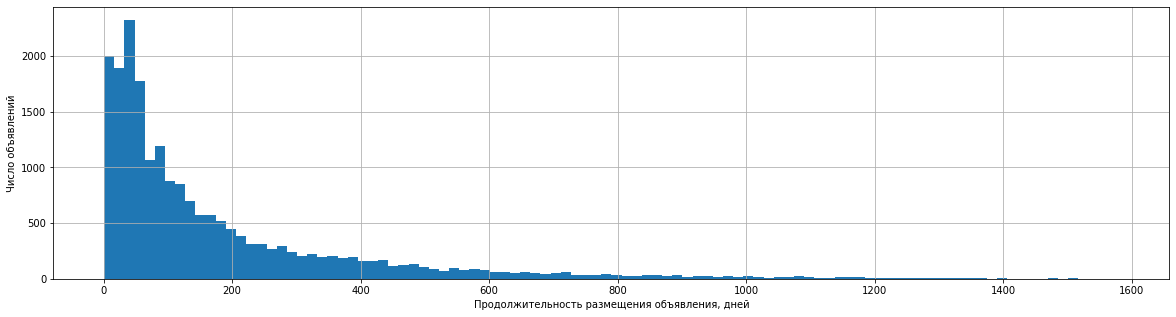

In [131]:
plt.rcParams['figure.figsize']=(20, 5)
df['days_exposition'].hist(bins=100)
plt.xlabel('Продолжительность размещения объявления, дней')
plt.ylabel('Чиcло объявлений')

**Распределение сильно вытянуто вправо, в выборке присутствуют значения `days_exposition` свыше 1400 дней.** 
- Такое возможно, когда люди продали квартиру и забыли снять объявление, или передумали продавать и сняли объявление через длительный срок. Также возможен вариант при котором цена квартиры, выставленная продавцом, оказывается слишком высокой и покупатель долго не находится.

**Значительная часть объявлений снимается в первые несколько дней после публикации.**
-  Вряд ли покупатель находится так быстро. Скорее всего это объявления тех, кто по каким-то причинам передумал продавать квартиру, также это могут быть ошибочные объявления - продавец опубликовал объявление, заметил ошибку или решил что-то изменить, и быстро удалил его. Некоторые объявления могут удаляться в первые дни модераторами как мошеннические или не соответсвующие правилам размещения.

**При такой форме распределения лучше полагаться на медиану как на характеристическое время, за которое продается квартира - это время составляет 95 дней. Посмотрим на диаграмму размаха:**

(0.0, 800.0)

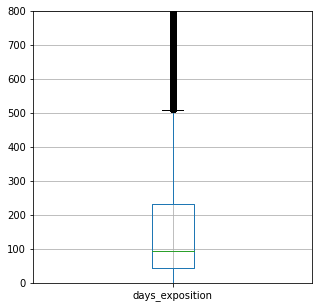

In [132]:
plt.rcParams['figure.figsize']=(5, 5)
df.boxplot(column = 'days_exposition')
plt.ylim(0,800)

**По диаграмме размаха можно сказать, что параметр `days_exposition` свыше 500 дней - необычно долгое время для продажи квартиры. Только 25 % квартир продаются в течение первых 45 дней. Даже если предположить, что эти квартиры распродаются равномерно в течение этого срока, то вероятность продажи квартиры в течение первых 9 дней должна составлять лишь 5 %. Т.е. все, что меньше 9 дней - необычно быстрая продажа.**

### Какие факторы больше всего влияют на общую стоимость объекта?

#### Стоимость квартиры и общая площадь

**Построим диаграмму рассеяния и вычислим коэффициент корреляции между стоимостью квартиры и общей площадью:**

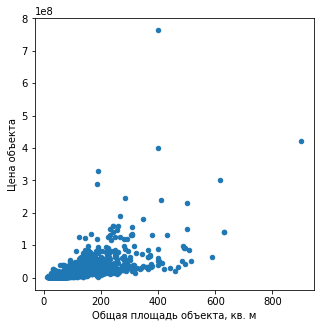

Коэффициент корреляции: 0.6538081893676136


In [133]:
plt.rcParams['figure.figsize']=(5, 5)
df.plot(x='total_area', y='last_price', kind='scatter')
plt.xlabel('Общая площадь объекта, кв. м')
plt.ylabel('Цена объекта')
plt.show()
print('Коэффициент корреляции:', df['total_area'].corr(df['last_price']))

**Связь между площадью квартиры и ценой однозначно существует. Однако, на величину коэффициента корреляции могут оказывать сильное влияние выбивающиеся значения по обоим параметрам (выбросы). Посмотрим на интервал +/- 2*IQR для обоих параметров и построим диаграмму разброса для данных без выбросов:**  

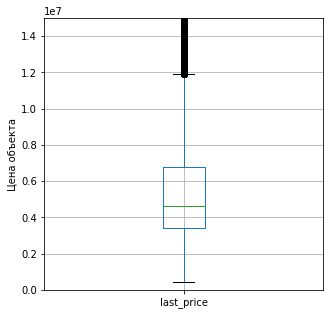

In [134]:
df.boxplot(column='last_price')
plt.ylim(0, 15000000)
plt.ylabel('Цена объекта')
plt.show()

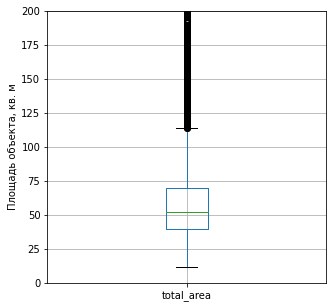

In [135]:
df.boxplot(column='total_area')
plt.ylim(0, 200)
plt.ylabel('Площадь объекта, кв. м')
plt.show()

**Создаем датафрейм без выбросов по цене и площади:**

In [136]:
df_no_price_area_outliers = df.query('last_price < 12000000 and total_area < 115')

**Строим диаграмму рассеяния и вычисляем коэффициент корреляции:**

Коэффициент корреляции: 0.6981196487371097


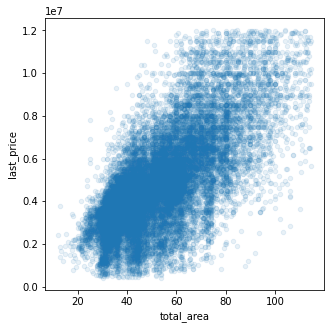

In [137]:
plt.rcParams['figure.figsize']=(5, 5)
df_no_price_area_outliers.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1)
print('Коэффициент корреляции:', df_no_price_area_outliers['total_area'].corr(df_no_price_area_outliers['last_price']))

**Коэффициент корреляции между ценой и площадью квартиры при избавлении от выбросов увеличился и стал равен ~0.7. Таким образом, до 70% вариации цены связано параметром площади квартиры. Однако, другие 30 % вариации должны обусловливаться другими факторами. Посмотрим какими.** 

#### Стоимость квартиры и жилая площадь

**Посмотрим как стоимость квартиры коррелирует с жилой площадью по "сырым" данным:**

Коэффициент, корреляции: 0.5561501687684124


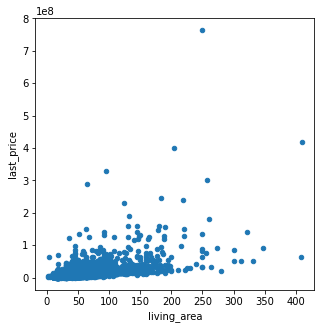

In [138]:
plt.rcParams['figure.figsize']=(5, 5)
df.plot(x='living_area', y='last_price', kind='scatter')
print('Коэффициент, корреляции:', df['living_area'].corr(df['last_price']))

**Получается, что стоимость коррелирует и с жилой площадью. Но, во-первых, в меньшей степени чем с общей площадью, а во-вторых, жилая площадь и общая площадь скорее всего тоже тесно связаны друг с другом. Проверим:**

Коэффициент корреляции: 0.9097804284258303


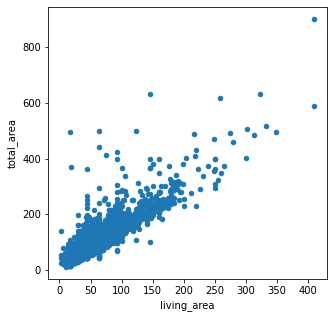

In [139]:
plt.rcParams['figure.figsize']=(5, 5)
df.plot(x='living_area', y='total_area', kind='scatter')
print('Коэффициент корреляции:', df['living_area'].corr(df['total_area']))

**Так и есть. Коэффициент корреляции между общей и жилой площадью очень высок. Делаем такой вывод: жилая площадь это второстепенный параметр по отношению к стоимости квартиры по сравнению с параметром общей площади. Если мы хотим оценить справедлива ли цена квартиры, то лучше ориентироваться на общую, а не на жилую площадь**

#### Стоимость квартиры и площадь кухни

**Построим диаграмму рассеяния для сочетания площадь кухни - цена:**

Коэффициент, корреляции: 0.5145041019604719


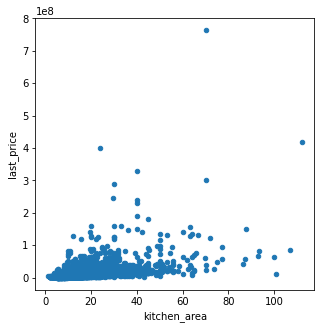

In [140]:
plt.rcParams['figure.figsize']=(5, 5)
df.plot(x='kitchen_area', y='last_price', kind='scatter')
print('Коэффициент, корреляции:', df['kitchen_area'].corr(df['last_price']))

**Цена не очень сильно коррелирует с площадью кухни. Помня о том, что цена связана с общей площадью, можно предположить следующее: в части квартир площадь кухни пропорциональна общей площади (допустим 1/3), в других квартирах пропорция площадь_кухни/общая_площадь может нарушаться: часто так бывает, что площадь квартиры увеличивается за счет жилой площади, а кухня по размеру такая же как в квартире с меньшей жилой площадью.**

**Посмотрим как площадь кухни коррелирует с общей площадью:**

Коэффициент корреляции: 0.6583875991718522


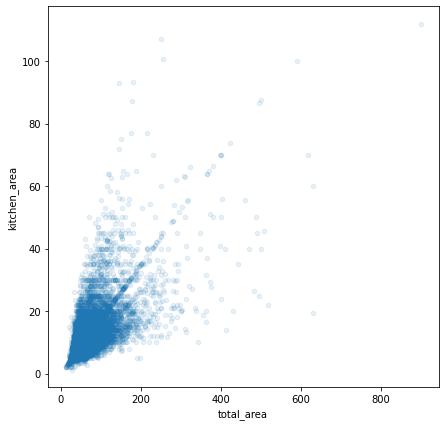

In [141]:
plt.rcParams['figure.figsize']=(7, 7)
df.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.1)
print('Коэффициент корреляции:', df['kitchen_area'].corr(df['total_area']))

**Действительно, на диаграмме рассеяния видно как выделяются два условных "направления" - для одного увеличение общей площади сопровождается пропорциональным увеличением площади кухни, для другого - рост общей площади влияет на площадь кухни в меньшей степени. Также на графике стали хорошо видны значения, которыми мы заменили отсутствующие данные о площади кухни- используя соотношение медианной площади кухни и медианной общей площади. Вывод такой - если рассматривать совокупные данные по всем квартирам, то площадь кухни не может служить достоверным параметром, по которому можно судить о справедливости цены квартиры, которую за нее просят**

#### Стоимость квартиры и число комнат

**Создадим сводную таблицу, в которую запишем данные о медианной стоимости квартиры в зависимости от числа комнат в ней, а также число квартир с таким количеством комнат:**

In [142]:
data_pivot_rooms=df.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])
data_pivot_rooms

,count,median
,last_price,last_price
rooms,,
0,197,2700000.0
1,8036,3600000.0
2,7923,4770338.0
3,5797,6200000.0
4,1175,9000000.0
5,326,14000000.0
6,105,19000000.0
7,59,24900000.0


**Судя по получившейся таблице, мы можем более или менее достоверно судить о медианных ценах на квартиры с числом комнат не более семи, т.к. квартир с бОльшим числом комнат в датасете очень мало. Удалим из сводной таблицы строки с `rooms` > 7 и построим гистограмму:**

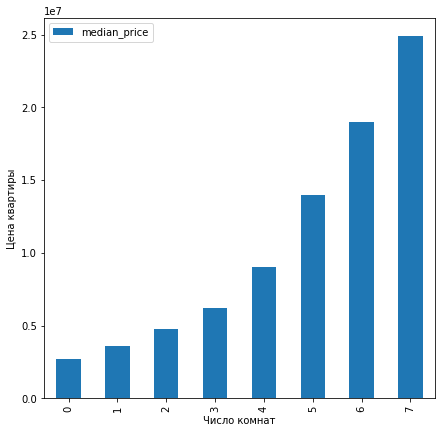

In [143]:
data_pivot_rooms.columns = ['count', 'median_price']

data_pivot_rooms = data_pivot_rooms.query('@data_pivot_rooms.index <= 7')
data_pivot_rooms.plot(y='median_price', kind='bar', ylabel = 'Цена квартиры', xlabel = 'Число комнат')
plt.show()

**Получается, что медианная стоимость квартиры для квартир до семи комнат растет с увеличением числа комнат. При этом прибавка в цене квартиры за каждую последующую комнату увеличивается. Возможно это так, потому что квартиры с бОльшим числом комнат это, как правило, жилье более высокого класса, где квадратный метр стоит дороже, чем в жилье эконом-класса**

#### Стоимость квартиры и тип этажа, на котором она размещена

**Оценим как тип этажа `floor_type` (первый, последний, другой) влияет на стоимость квартиры. Для этого создадим сводную таблицу:**

In [144]:
data_pivot_floor_type = df.pivot_table(index = 'floor_type', values='last_price', aggfunc=['count', 'median'])
data_pivot_floor_type.columns = ['count', 'median_price']
data_pivot_floor_type

,count,median_price
floor_type,,
другой,17323,4850000.0
неизвестно,88,5000000.0
первый,2909,3900000.0
последний,3329,4300000.0


**Удалим строку, содержащую данные о квартирах, для которых неизвестен тип этажа:**

In [145]:
data_pivot_floor_type = data_pivot_floor_type.query('@data_pivot_floor_type.index != "неизвестно"')
data_pivot_floor_type

,count,median_price
floor_type,,
другой,17323,4850000.0
первый,2909,3900000.0
последний,3329,4300000.0


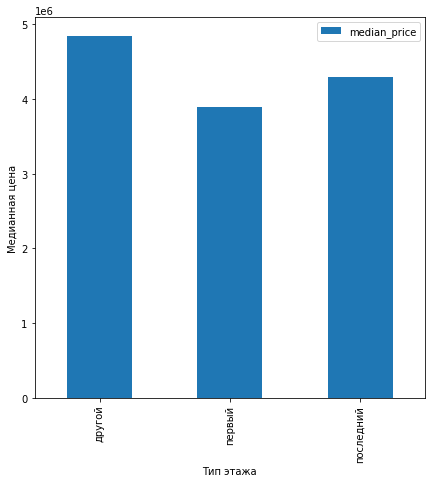

In [146]:
data_pivot_floor_type.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='Тип этажа')
plt.show()

**Квартиры на первых и последних этажах стоят меньше, чем на других этажах. Медианная стоимость квартиры на первом этаже - 3.9 млн, на последнем - 4.3 млн, на других - 4.85 млн**

#### Стоимость квартиры и день, месяц и год публикации объявления

**Посчитаем медианную стоимость квартиры в зависимости от того, в какой день недели опубликовано объявление:**

In [147]:
day_pivot_table = df.pivot_table(index='day_of_week', values='last_price', aggfunc= 'median')
day_pivot_table.columns=['median_price']
day_pivot_table

,median_price
day_of_week,
0,4650000.0
1,4720000.0
2,4700000.0
3,4650000.0
4,4577500.0
5,4575000.0
6,4550000.0


(3000000.0, 5000000.0)

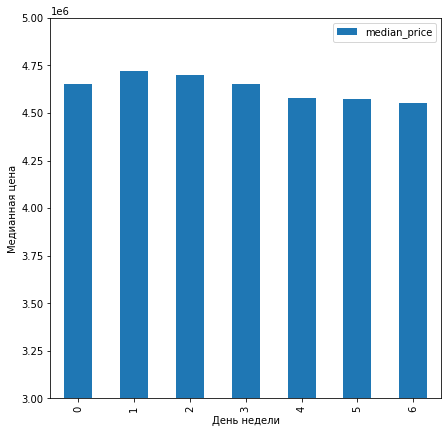

In [148]:
day_pivot_table.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='День недели')
plt.ylim(3000000,5000000)

**Минимальная медианная цена за квартиру в объявлениях, опубликованных в воскресенье - 4550 тыс. Максимальная - во вторник: 4720 тыс. Разброс цен - 170 тыс. Похоже, что у продавцов присутствует по меньшей мере тенденция ставить более низкую цену на жилье ближе к концу недели, т.е. к выходным дням. За объяснением этого факта, пожалуй, стоит обратиться к социологам или психологам**

**Теперь посмотрим как цена зависит от месяца публикации:**

In [149]:
month_pivot_table = df.pivot_table(index='month', values='last_price', aggfunc= 'median')
month_pivot_table.columns=['median_price']
month_pivot_table

,median_price
month,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4500000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


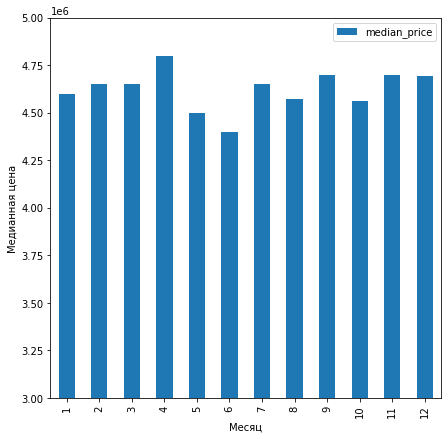

In [150]:
month_pivot_table.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='Месяц')
plt.ylim(3000000,5000000)
plt.show()

**Судя по таблице и графику - самые низкие медианные цены на жилье ставят в мае и июне (4500 и 4400 тыс), а самые высокие - в апреле (4800 тыс). Возможно это связано с балансом спроса и предложения на рынке недвижимости: в мае много праздников, в июне начинается отпускной сезон и спрос снижается**

**Рассмотрим зависимость медианной цены от года публикации объявления:**

In [151]:
year_pivot_table = df.pivot_table(index='year', values='last_price', aggfunc= 'median')
year_pivot_table.columns=['median_price']
year_pivot_table

,median_price
year,
2014,7640000.0
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


**Поскольку данные за 2014 и 2019 год - неполные. Не будем учитывать их в анализе:**

In [152]:
year_pivot_table = year_pivot_table.drop(year_pivot_table.index[[0,5]])
year_pivot_table

,median_price
year,
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0


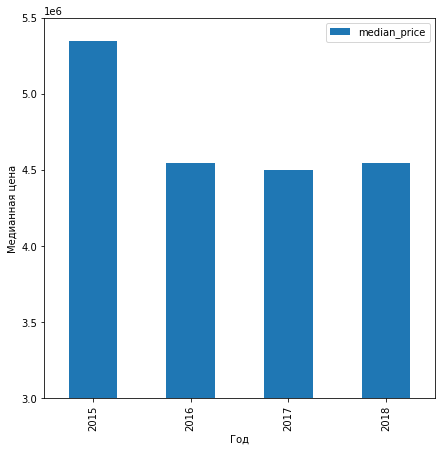

In [153]:
year_pivot_table.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='Год')
plt.ylim(3000000,5500000)
plt.show()

**По этим данным получается, что медианная цена квартиры резко снизилась в 2016 году по сравнению с 2017 и затем не менялась вплоть до 2018 года. Как такое может быть, особенно в свете того, что нам сообщают о регулярном подорожании жилья? Взглянем на то, как менялась цена квадратного метра недвижимости в указанные годы:**

In [154]:
year_pivot_table_2 = df.pivot_table(index='year', values='price_per_meter_sq', aggfunc= 'median')
year_pivot_table_2.columns=['median_price']
year_pivot_table_2

,median_price
year,
2014,106901.898734
2015,93396.226415
2016,91666.666667
2017,92569.659443
2018,95704.323236
2019,103328.870216


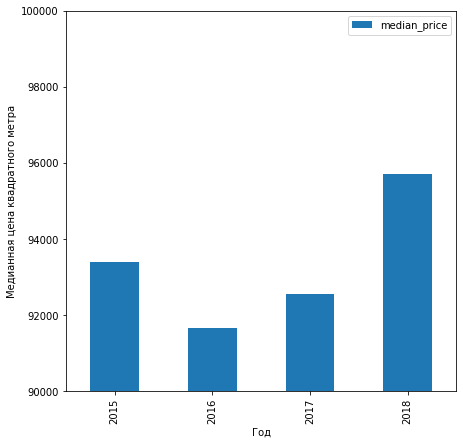

In [155]:
year_pivot_table_2 = year_pivot_table_2.drop(year_pivot_table_2.index[[0,5]])
year_pivot_table_2.plot(y='median_price', kind='bar', ylabel='Медианная цена квадратного метра', xlabel='Год')
plt.ylim(90000,100000)
plt.show()

**Интересно. Цена квадратного метра жилья действительно упала в 2016 году по сравнению с 2015, но уже в 2018-м она превысила значение для 2015 года. Получается, средняя цена квартиры не меняется, а цена за квадратный метр растет. Вероятно, с 2015 года площади продаваемых объектов снизились - другое объяснение найти трудно. Посмотрим, как менялась медианная площадь квартир от года к году:**

In [156]:
year_pivot_table_area = df.pivot_table(index='year', values='total_area', aggfunc= 'median')
year_pivot_table_area.columns=['median_price']
year_pivot_table_area = year_pivot_table_area.drop(year_pivot_table_area.index[[0,5]])
year_pivot_table_area

,median_price
year,
2015,60.00
2016,53.02
2017,52.00
2018,50.50


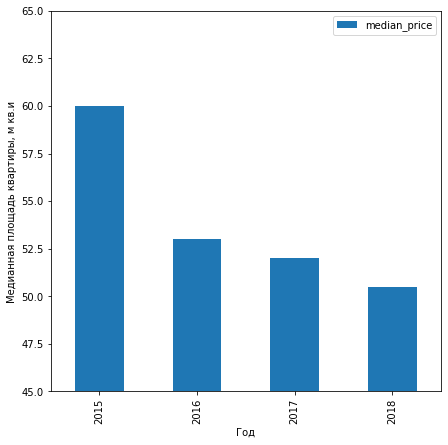

In [157]:
year_pivot_table_area.plot(y='median_price', kind='bar', ylabel='Медианная площадь квартиры, м кв.и', xlabel='Год')
plt.ylim(45,65)
plt.show()

**Реальность неутешительна - от года к году площадь квартир на рынке жилья снижается, а цена квадратного метра растет. Поэтому мы почти не видим изменений медианной цены квартиры за 2016-2018 годы.**

### Стоимость квадратного метра в 10 самых популярных населенных пунктах

**Для начала найдем 10 населенных пунктов с самым большим числом объявлений:**

In [158]:
df_most_popular = df.pivot_table(index='new_locality_name', values = 'last_price', aggfunc='count').sort_values(by='last_price', ascending = False)
most_popular_places = df_most_popular.index[0:10]
most_popular_places

Index(['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='new_locality_name')

**Посчитаем медианную стоимость квадратного метра в этих населенных пунктах:**

In [159]:
prices=[]
for place in most_popular_places:
    place_df = df.query('new_locality_name == @place')
    median_price_per_sqm = place_df['price_per_meter_sq'].median()
    prices.append(median_price_per_sqm)
prices
prices = [round(elem, 0) for elem in prices]

**Запишем полученные данные в датафрейм**

In [160]:
ten_most_popular_places = pd.DataFrame(data=prices, index=most_popular_places, columns=['median_price_per_sqm'])
ten_most_popular_places

,median_price_per_sqm
new_locality_name,
Санкт-Петербург,104766.0
поселок Мурино,85878.0
поселок Шушары,76876.0
Всеволожск,65789.0
Пушкин,100000.0
Колпино,74724.0
поселок Парголово,91643.0
Гатчина,67797.0
деревня Кудрово,91860.0


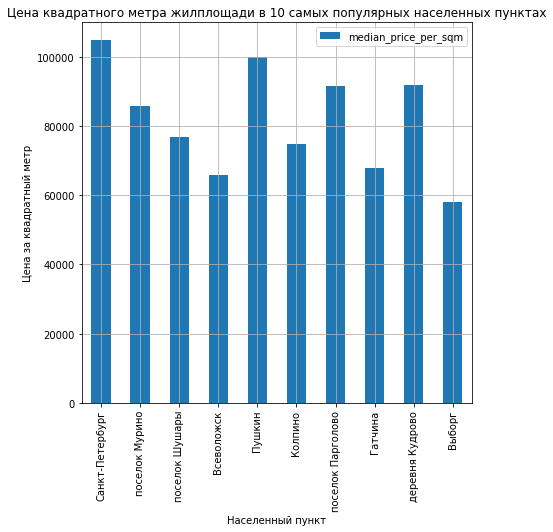

In [161]:
plt.rcParams['figure.figsize']=(7, 7)
ten_most_popular_places.plot(kind='bar', xlabel='Населенный пункт', ylabel='Цена за квадратный метр', title='Цена квадратного метра жилплощади в 10 самых популярных населенных пунктах', grid = True)
plt.show()

### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [162]:
df_median_price_location = df.pivot_table(index='new_locality_name', values = 'price_per_meter_sq', aggfunc='median').sort_values(by='price_per_meter_sq', ascending = False)
df_median_price_location

,price_per_meter_sq
new_locality_name,
Санкт-Петербург,104766.085539
Зеленогорск,101666.666667
Пушкин,100000.000000
Кудрово,100000.000000
Сестрорецк,99678.456592
...,...
поселок Совхозный,12629.129129
деревня Выскатка,12335.480902
деревня Вахнова Кара,11688.311688


**Самая высокая медианная цена за квадратный метр в Санкт-Петербурге - 104766, а самая низкая - в д. Старополье - 11000**

### Зависимость стоимости квартиры в Санкт-Петербурге от расстояния до центра города

**Создадим датафрейм, в который войдут только данные по Санкт-Петербургу**

In [163]:
df_spb = df.query('new_locality_name == "Санкт-Петербург"')
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,price_per_meter_sq,day_of_week,month,year,floor_type,city_centers_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,True,...,2,0.755,<NA>,Санкт-Петербург,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.3,4,True,...,2,0.574,558,Санкт-Петербург,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,45.0,9,True,...,3,0.234,424,Санкт-Петербург,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,True,...,1,0.048,121,Санкт-Петербург,100000.000000,1,6,2018,другой,8.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,30.5,22,True,...,0,NaN,<NA>,Санкт-Петербург,110544.692737,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15,16.3,4,True,...,2,0.652,29,Санкт-Петербург,100566.572238,2,2,2018,другой,16.0
23640,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5,31.0,2,True,...,0,NaN,15,Санкт-Петербург,105769.230769,3,7,2018,другой,6.0
23641,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25,40.3,7,True,...,1,0.806,519,Санкт-Петербург,129903.978052,3,10,2016,другой,4.0
23644,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,True,...,3,0.381,<NA>,Санкт-Петербург,72490.845228,1,3,2017,другой,4.0


**Создадим сводную таблицу, в которой индексами будут расстояния в км от центра города, а значениями - медианная цена за квадратный метр жилья**

In [164]:
city_center_pivot = df_spb.pivot_table(index='city_centers_km', values = 'price_per_meter_sq', aggfunc='median')
city_center_pivot

,price_per_meter_sq
city_centers_km,
0.0,172619.047619
1.0,128485.110056
2.0,123035.513418
3.0,108469.112355
4.0,117952.262904
5.0,127093.283865
6.0,131835.227273
7.0,127017.083563
8.0,122944.928910


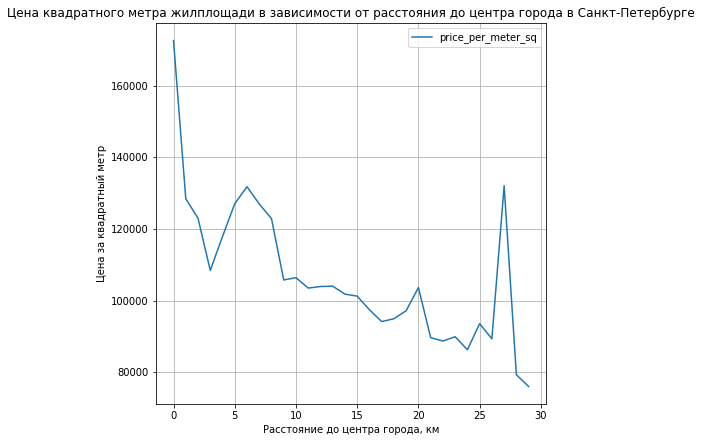

In [165]:
plt.rcParams['figure.figsize']=(7, 7)
city_center_pivot.plot(kind='line', xlabel='Расстояние до центра города, км', ylabel='Цена за квадратный метр', title='Цена квадратного метра жилплощади в зависимости от расстояния до центра города в Санкт-Петербурге', grid = True)
plt.show()

**Медианная цена квадратного метра жилплощади снижается по мере удаления от центра Петербурга. Вместе с тем, на графике наблюдаются всплески цены за квадратный метр на расстояниях 5, 20 и 27 километров от центра. Скорее всего это связано с тем, что на этих расстояниях находятся дорогие районы города - такие как, например, Петроградка или Крестовский остров. Пик на 27 км скорее всего отражает высокую цену за квадратный метр в Курортном районе**

**Рассчитаем на сколько в среденем снижается медианная цена квадратного метра с каждым километром:**

In [166]:
price_per_km = (city_center_pivot.loc[0, 'price_per_meter_sq'] - city_center_pivot.loc[29, 'price_per_meter_sq'])/29
price_per_km

3328.769427838816

## Вывод

**В  проете проведено исследование рынка квартир в Санкт-Петербурге и Ленинградской области по данным, представленным сервисом размещения объявлений о продаже недвижимости. Данные охватывают период с ноября 2014 по май 2019 года. Датасет содержит данные о более чем 23 тысячах объектов недвижимости**

**По результатам исследования можно сделать следующие выводы:**

- **Медианное время за которое продается квартира составляет 95 дней (время с момента публикации объявления до момента его снятия). Продажи быстрее 9 дней можно считать необычно быстрыми, а продажи, которые занимают более 500 дней - необычно долгими.**

- **Цена квартиры сильно коррелирует с общей площадью жилья (коэффициент корреляции R=0.7). Именно этот фактор стоит использовать в качестве основного показателя для оценки того, является ли цена квартиры справедливой.**

- **Факторы жилой площади и площади кухни не так сильно связаны с ценой квартиры, как ее общая площадь, хотя тоже коррелируют с ценой (R=0.55 и 0.52, соответственно). Следует признать эти факторы второстепенными и менее информативными для оценки стоимости жилья, по сравнению с общей площадью.**

- **Медианная стоимость квартиры растет с увеличением числа комнат. При этом прибавка в цене квартиры за каждую последующую комнату увеличивается. Это наблюдение справедливо для квартир с числом комнат не более 7-ми. Количество объявлений о продаже квартир с бОльшим количеством комнат слишком мало, чтобы делать о них какие-либо выводы.**

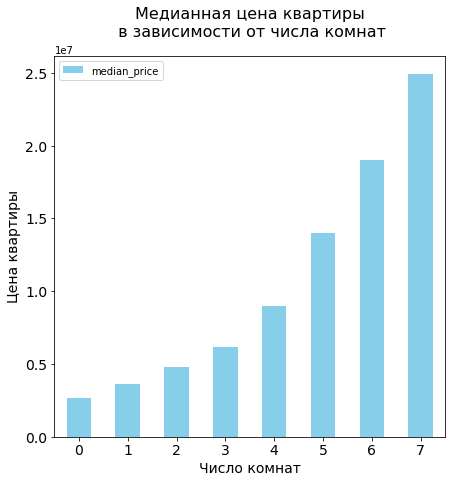

In [167]:
data_pivot_rooms.plot(y='median_price', kind='bar', ylabel = 'Цена квартиры', xlabel = 'Число комнат', color='skyblue')
plt.title(label='Медианная цена квартиры\n в зависимости от числа комнат', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Цена квартиры', fontsize=14)
plt.xlabel('Число комнат', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Квартиры на первых и последних этажах в среднем дешевле, чем квартиры на других этажах.**

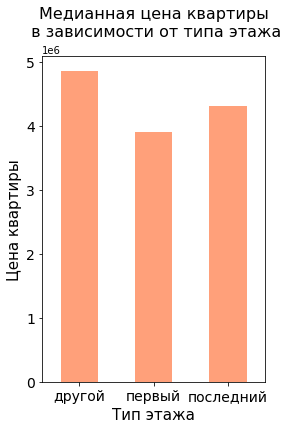

In [168]:
data_pivot_floor_type.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='Тип этажа', color='lightsalmon', legend=None, figsize=(4,6))
plt.title(label='Медианная цена квартиры\n в зависимости от типа этажа', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Цена квартиры', fontsize=15)
plt.xlabel('Тип этажа', fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Январь и май самые непопулярные месяцы для подачи объявления о продаже квартиры. Вероятно, это связано с длинными каникулами в том и другом месяце. Летом публикаций среднее количество, в феврале, марте и апреле -стабильно высокое. Осенью наблюдается рост числа объявлений от месяца к месяцу. Самый популярный месяц для публикации объявления о продаже квартиры осенью - ноябрь**

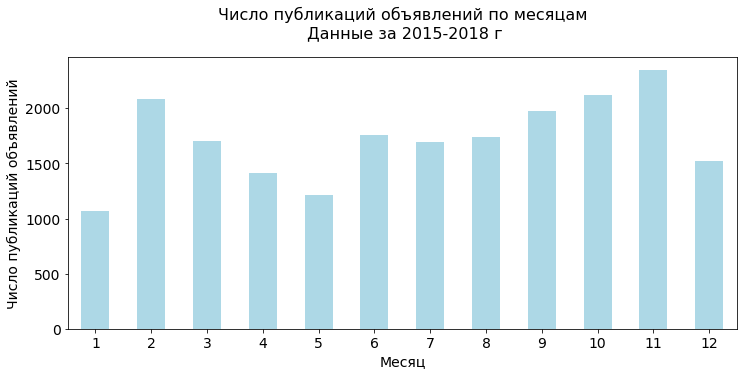

In [169]:
df.query('year != [2014, 2019]').pivot_table(index='month', values='last_price', aggfunc='count').\
plot(y='last_price', figsize=(12,5), kind='bar', ylabel='Число объявлений', xlabel='Месяц', color='lightblue', legend=None)
plt.title(label='Число публикаций объявлений по месяцам\n Данные за 2015-2018 г', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Число публикаций объявлений', fontsize=14)
plt.xlabel('Месяц', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Больше всего объявлений публикуют в будние дни, и существенно меньше - по выходным**

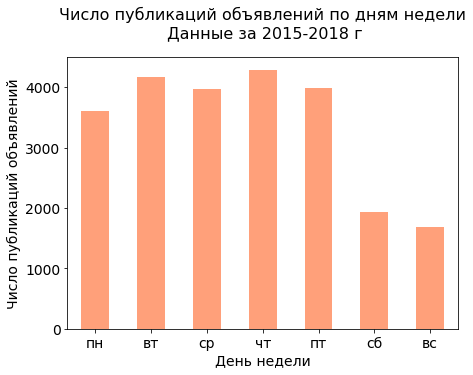

In [170]:
df.pivot_table(index='day_of_week', values='last_price', aggfunc='count'). plot(y='last_price', figsize=(7,5), kind='bar', ylabel='Число объявлений', xlabel='День недели', color='lightsalmon', legend=None)
plt.title(label='Число публикаций объявлений по дням недели\n Данные за 2015-2018 г', loc='center', fontsize=16, fontweight='regular', pad=20)
plt.ylabel('Число публикаций объявлений', fontsize=14)
plt.xlabel('День недели', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['пн','вт','ср','чт', 'пт', 'сб', 'вс'], rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Топ-10 локаций по количеству объявлений о продаже квартир и медианная ценка квадратного метра в этих локациях:**

In [171]:
ten_most_popular_places = pd.DataFrame(data=prices, index=most_popular_places, columns=['median_price_per_sqm'])
ten_most_popular_places.columns = ['Цена за кв. метр']
ten_most_popular_places.index.names = ['Населенный пункт']
ten_most_popular_places

,Цена за кв. метр
Населенный пункт,
Санкт-Петербург,104766.0
поселок Мурино,85878.0
поселок Шушары,76876.0
Всеволожск,65789.0
Пушкин,100000.0
Колпино,74724.0
поселок Парголово,91643.0
Гатчина,67797.0
деревня Кудрово,91860.0


- **Самая высокоя медианная стоимость квадратного метра жилья - в Санкт-Петербурге. Она составляет - 104766, а самая низкая в д. Старополье - 11000.**

- **Медианная цена квадратного метра жилплощади в Санкт-Петербурге снижается по мере удаления от центра города. В среднем это снижение составляет 3328 на 1 км.**

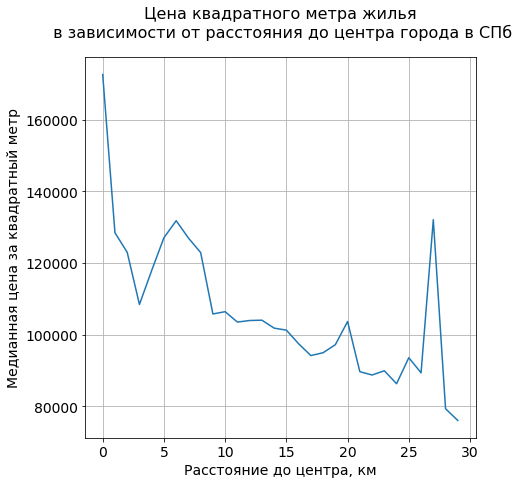

In [172]:
city_center_pivot.plot(kind='line', xlabel='Расстояние до центра города, км', ylabel='Цена за квадратный метр', title='Цена квадратного метра жилплощади в зависимости от расстояния до центра города в Санкт-Петербурге', grid = True, figsize = (7,7), legend = None)
plt.title(label = 'Цена квадратного метра жилья\n в зависимости от расстояния до центра города в СПб', loc = 'center', fontsize = 16, fontweight = 'regular', pad = 20)
plt.ylabel('Медианная цена за квадратный метр', fontsize=14)
plt.xlabel('Расстояние до центра, км', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Цена квартир, объявления о которых публикуют в начале недели (пн, вт, ср) как правило несколько выше, чем в объявлениях ближе к концу недели. Можно предположить, что это обусловлено какими-то психосоциальными факторами**

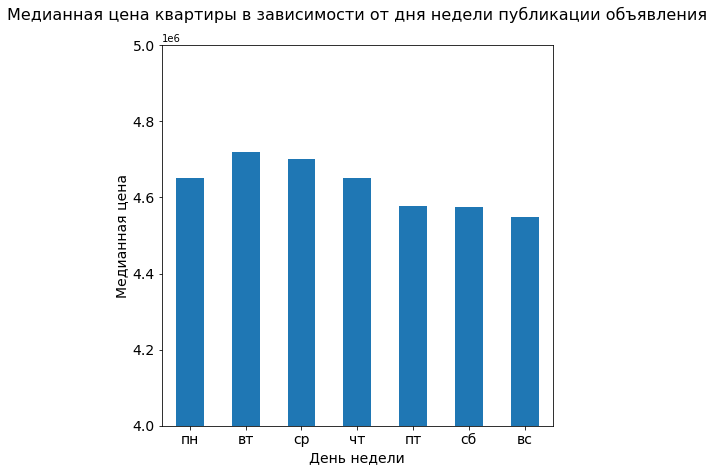

In [173]:
day_pivot_table.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='День недели', legend=None)
plt.title(label='Медианная цена квартиры в зависимости от дня недели публикации объявления', loc='center', fontsize=16, fontweight='regular', pad=25)
plt.ylim(4000000,5000000)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Медианная цена', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['пн','вт','ср','чт', 'пт', 'сб', 'вс'], rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- **Месяц публикации объявления оказывает влияние на стоимость объекта - самая высокая медианная цена на квартиры в апреле (4800 тыс), а самая низкая - в мае и июне (4500 и 4400 тыс). Вероятно, это связано с изменением баланса спроса и предложения на рынке недвижимости: в мае много праздников, в июне начинается отпускной сезон и спрос снижается. Рост цены с января по апрель можно объяснить постепенной "раскачкой" покупателей и ростом спроса на жилье после новогоднего праздничного периода. Сравнительно высокая цена в ноябре и декабре, вероятно, связана с естественным стремлением покупателей завершить дела с покупкой недвижимости до конца года**

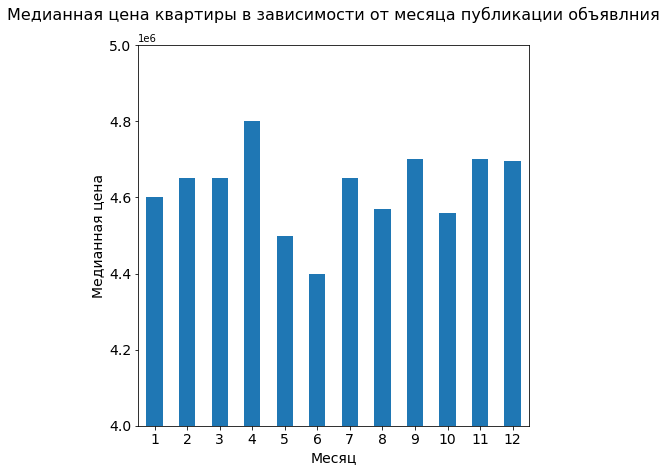

In [174]:
month_pivot_table.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='Месяц', legend=None)
plt.title(label='Медианная цена квартиры в зависимости от месяца публикации объявлния', loc='center', fontsize=16, fontweight='regular', pad=25)
plt.xlabel('Месяц', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Медианная цена', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylim(4000000,5000000)
plt.show()

- **Медианная стоимость квартиры резко упала в 2016 году по сравнению с 2015 годом и мало менялась с 2016 по 2018 годы. Это видно на графике ниже:** 

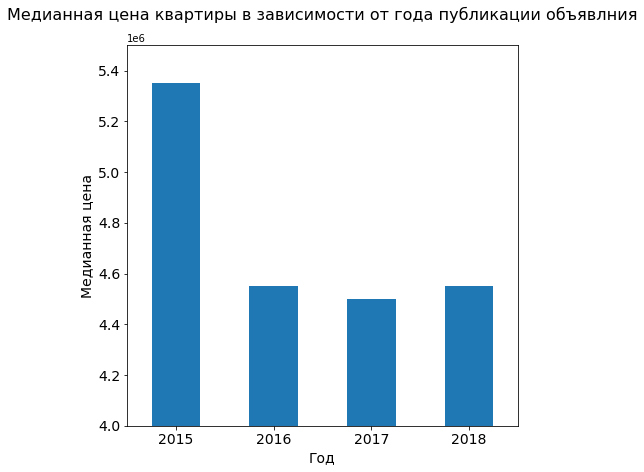

In [175]:
year_pivot_table.plot(y='median_price', kind='bar', ylabel='Медианная цена', xlabel='Год', legend=None)
plt.title(label='Медианная цена квартиры в зависимости от года публикации объявлния', loc='center', fontsize=16, fontweight='regular', pad=25)
plt.xlabel('Год', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Медианная цена', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylim(4000000,5500000)
plt.show()

**Такая динамика медианной цены НЕ указывает на то, что цены на жилье в 2018 году были ниже, чем в 2015. Реальная причина такой динамики в резком снижении площади продаваемого жилья на фоне равномерного роста цены за один квадратный метр с 2016 по 2018 годы:**

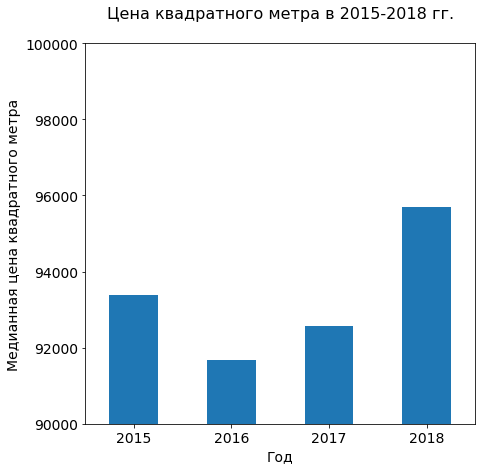

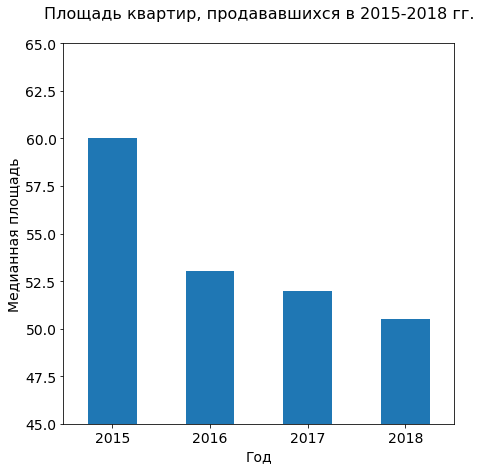

In [176]:
year_pivot_table_2.plot(y='median_price', kind='bar', ylabel='Медианная цена квадратного метра', xlabel='Год', legend=False)
plt.title(label='Цена квадратного метра в 2015-2018 гг.', loc='center', fontsize=16, fontweight='regular', pad=25)
plt.xlabel('Год', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Медианная цена квадратного метра', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylim(90000,100000)
plt.show()

year_pivot_table_area.plot(y='median_price', kind='bar', ylabel='Медианная площадь квартиры, м кв.', xlabel='Год', legend=False)
plt.title(label='Площадь квартир, продававшихся в 2015-2018 гг.', loc='center', fontsize=16, fontweight='regular', pad=25)
plt.xlabel('Год', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.ylabel('Медианная площадь', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylim(45,65)
plt.show()